In [1]:
import numpy as np
import pandas as pd
import warnings
import calendar
warnings.filterwarnings('ignore')

# import libraties
import matplotlib.pyplot as plt
import seaborn as sns
#Suppressing scientific notation to float only 
pd.options.display.float_format = '{:,.2f}'.format

from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [2]:
#Reading file for Gaming Accessory
GamingAccessory = pd.read_csv('GamingAccessory.csv')
GamingAccessory.head()

,Unnamed: 0,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,inc_PO_MA3,LP_lag_1_per,LP_lag_2_per,LP_lag_3_per,PO_lag_1_per-1,PO_lag_1_per-2,PO_lag_1_per-3,GMV_lag_1_per,GMV_lag_2_per,GMV_lag_3_per
0,1555,2015-10-04,2015,10,"1,408,216,975,064,600.00","1,408,216,975,064,600.00","3,075.00",1,0,0,...,nan,0.12,0.06,0.18,-0.26,-0.16,-0.34,0.12,0.06,0.18
1,1556,2015-10-14,2015,10,"1,416,985,339,691,600.00","1,416,985,339,691,600.00","2,750.00",1,0,0,...,nan,-0.05,0.05,-0.01,0.14,-0.10,0.02,-0.05,0.05,-0.01
2,1557,2015-10-15,2015,10,"1,417,669,228,375,400.00","1,417,669,228,375,400.00","2,899.00",1,0,0,...,nan,0.11,0.05,0.05,-0.21,-0.10,-0.12,0.11,0.05,0.05
3,1558,2015-10-17,2015,10,"1,419,414,998,353,400.00","1,419,414,998,353,400.00","2,609.00",1,0,0,...,0.19,-0.06,-0.05,-0.13,0.13,0.11,0.39,-0.06,-0.05,-0.13
4,1559,2015-10-26,2015,10,"1,427,167,582,532,600.00","1,427,167,582,532,600.00","2,772.00",1,0,0,...,-0.01,0.01,-0.08,-0.10,-0.02,0.23,0.33,0.01,-0.08,-0.10


In [3]:
GamingAccessory = GamingAccessory.drop(['Unnamed: 0'], axis=1)
GamingAccessory.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,inc_PO_MA3,LP_lag_1_per,LP_lag_2_per,LP_lag_3_per,PO_lag_1_per-1,PO_lag_1_per-2,PO_lag_1_per-3,GMV_lag_1_per,GMV_lag_2_per,GMV_lag_3_per
0,2015-10-04,2015,10,"1,408,216,975,064,600.00","1,408,216,975,064,600.00","3,075.00",1,0,0,COD,...,nan,0.12,0.06,0.18,-0.26,-0.16,-0.34,0.12,0.06,0.18
1,2015-10-14,2015,10,"1,416,985,339,691,600.00","1,416,985,339,691,600.00","2,750.00",1,0,0,COD,...,nan,-0.05,0.05,-0.01,0.14,-0.10,0.02,-0.05,0.05,-0.01
2,2015-10-15,2015,10,"1,417,669,228,375,400.00","1,417,669,228,375,400.00","2,899.00",1,0,0,Prepaid,...,nan,0.11,0.05,0.05,-0.21,-0.10,-0.12,0.11,0.05,0.05
3,2015-10-17,2015,10,"1,419,414,998,353,400.00","1,419,414,998,353,400.00","2,609.00",1,0,0,Prepaid,...,0.19,-0.06,-0.05,-0.13,0.13,0.11,0.39,-0.06,-0.05,-0.13
4,2015-10-26,2015,10,"1,427,167,582,532,600.00","1,427,167,582,532,600.00","2,772.00",1,0,0,Prepaid,...,-0.01,0.01,-0.08,-0.10,-0.02,0.23,0.33,0.01,-0.08,-0.10


In [4]:
# Drop lag, MA and GMV columns
GamingAccessory = GamingAccessory.drop(['inc_LP_MA1','inc_LP_MA2','inc_LP_MA3','inc_PO_MA1','inc_PO_MA2','inc_PO_MA3',
                              'LP_lag_3_per','PO_lag_1_per-3','GMV_lag_3_per'], axis=1)

GamingAccessory.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock,LP_lag_1_per,LP_lag_2_per,PO_lag_1_per-1,PO_lag_1_per-2,GMV_lag_1_per,GMV_lag_2_per
0,2015-10-04,2015,10,"1,408,216,975,064,600.00","1,408,216,975,064,600.00","3,075.00",1,0,0,COD,...,"15,747,089.60","72,093,251.50",0.00,0.00,0.12,0.06,-0.26,-0.16,0.12,0.06
1,2015-10-14,2015,10,"1,416,985,339,691,600.00","1,416,985,339,691,600.00","2,750.00",1,0,0,COD,...,"23,620,634.40","108,139,877.25",0.00,0.00,-0.05,0.05,0.14,-0.10,-0.05,0.05
2,2015-10-15,2015,10,"1,417,669,228,375,400.00","1,417,669,228,375,400.00","2,899.00",1,0,0,Prepaid,...,"27,557,406.80","126,163,190.13",0.00,0.00,0.11,0.05,-0.21,-0.10,0.11,0.05
3,2015-10-17,2015,10,"1,419,414,998,353,400.00","1,419,414,998,353,400.00","2,609.00",1,0,0,Prepaid,...,"29,525,793.00","135,174,846.56",0.00,0.00,-0.06,-0.05,0.13,0.11,-0.06,-0.05
4,2015-10-26,2015,10,"1,427,167,582,532,600.00","1,427,167,582,532,600.00","2,772.00",1,0,0,Prepaid,...,"30,509,986.10","139,680,674.78",0.00,0.00,0.01,-0.08,-0.02,0.23,0.01,-0.08


In [5]:
GamingAccessory['LP_lag_1_per'] = GamingAccessory['LP_lag_1_per'].fillna(0)
GamingAccessory['LP_lag_2_per'] = GamingAccessory['LP_lag_2_per'].fillna(0)

GamingAccessory['PO_lag_1_per-1'] = GamingAccessory['PO_lag_1_per-1'].fillna(0)
GamingAccessory['PO_lag_1_per-2'] = GamingAccessory['PO_lag_1_per-2'].fillna(0)

GamingAccessory['GMV_lag_1_per'] = GamingAccessory['GMV_lag_1_per'].fillna(0)
GamingAccessory['GMV_lag_2_per'] = GamingAccessory['GMV_lag_2_per'].fillna(0)

In [6]:
GamingAccessory['PO_lag_1_per-1'] = GamingAccessory['PO_lag_1_per-1'].replace([np.inf, -np.inf], 0)

In [7]:
GamingAccessory['PO_lag_1_per-2'] = GamingAccessory['PO_lag_1_per-2'].replace([np.inf, -np.inf], 0)

In [8]:
GamingAccessory = GamingAccessory.drop(['order_date', 'Year', 'Month', 'order_id', 'order_item_id', 'week', 'week_y', 'month_date'], 
                            axis=1)
GamingAccessory.head()

,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,...,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock,LP_lag_1_per,LP_lag_2_per,PO_lag_1_per-1,PO_lag_1_per-2,GMV_lag_1_per,GMV_lag_2_per
0,"3,075.00",1,0,0,COD,9,GamingHardware,GamingAccessory,GamePad,"3,999.00",...,"15,747,089.60","72,093,251.50",0.00,0.00,0.12,0.06,-0.26,-0.16,0.12,0.06
1,"2,750.00",1,0,0,COD,7,GamingHardware,GamingAccessory,GamePad,"3,999.00",...,"23,620,634.40","108,139,877.25",0.00,0.00,-0.05,0.05,0.14,-0.10,-0.05,0.05
2,"2,899.00",1,0,0,Prepaid,5,GamingHardware,GamingAccessory,GamePad,"3,999.00",...,"27,557,406.80","126,163,190.13",0.00,0.00,0.11,0.05,-0.21,-0.10,0.11,0.05
3,"2,609.00",1,0,0,Prepaid,5,GamingHardware,GamingAccessory,GamePad,"3,999.00",...,"29,525,793.00","135,174,846.56",0.00,0.00,-0.06,-0.05,0.13,0.11,-0.06,-0.05
4,"2,772.00",1,0,0,Prepaid,5,GamingHardware,GamingAccessory,GamePad,"3,999.00",...,"30,509,986.10","139,680,674.78",0.00,0.00,0.01,-0.08,-0.02,0.23,0.01,-0.08


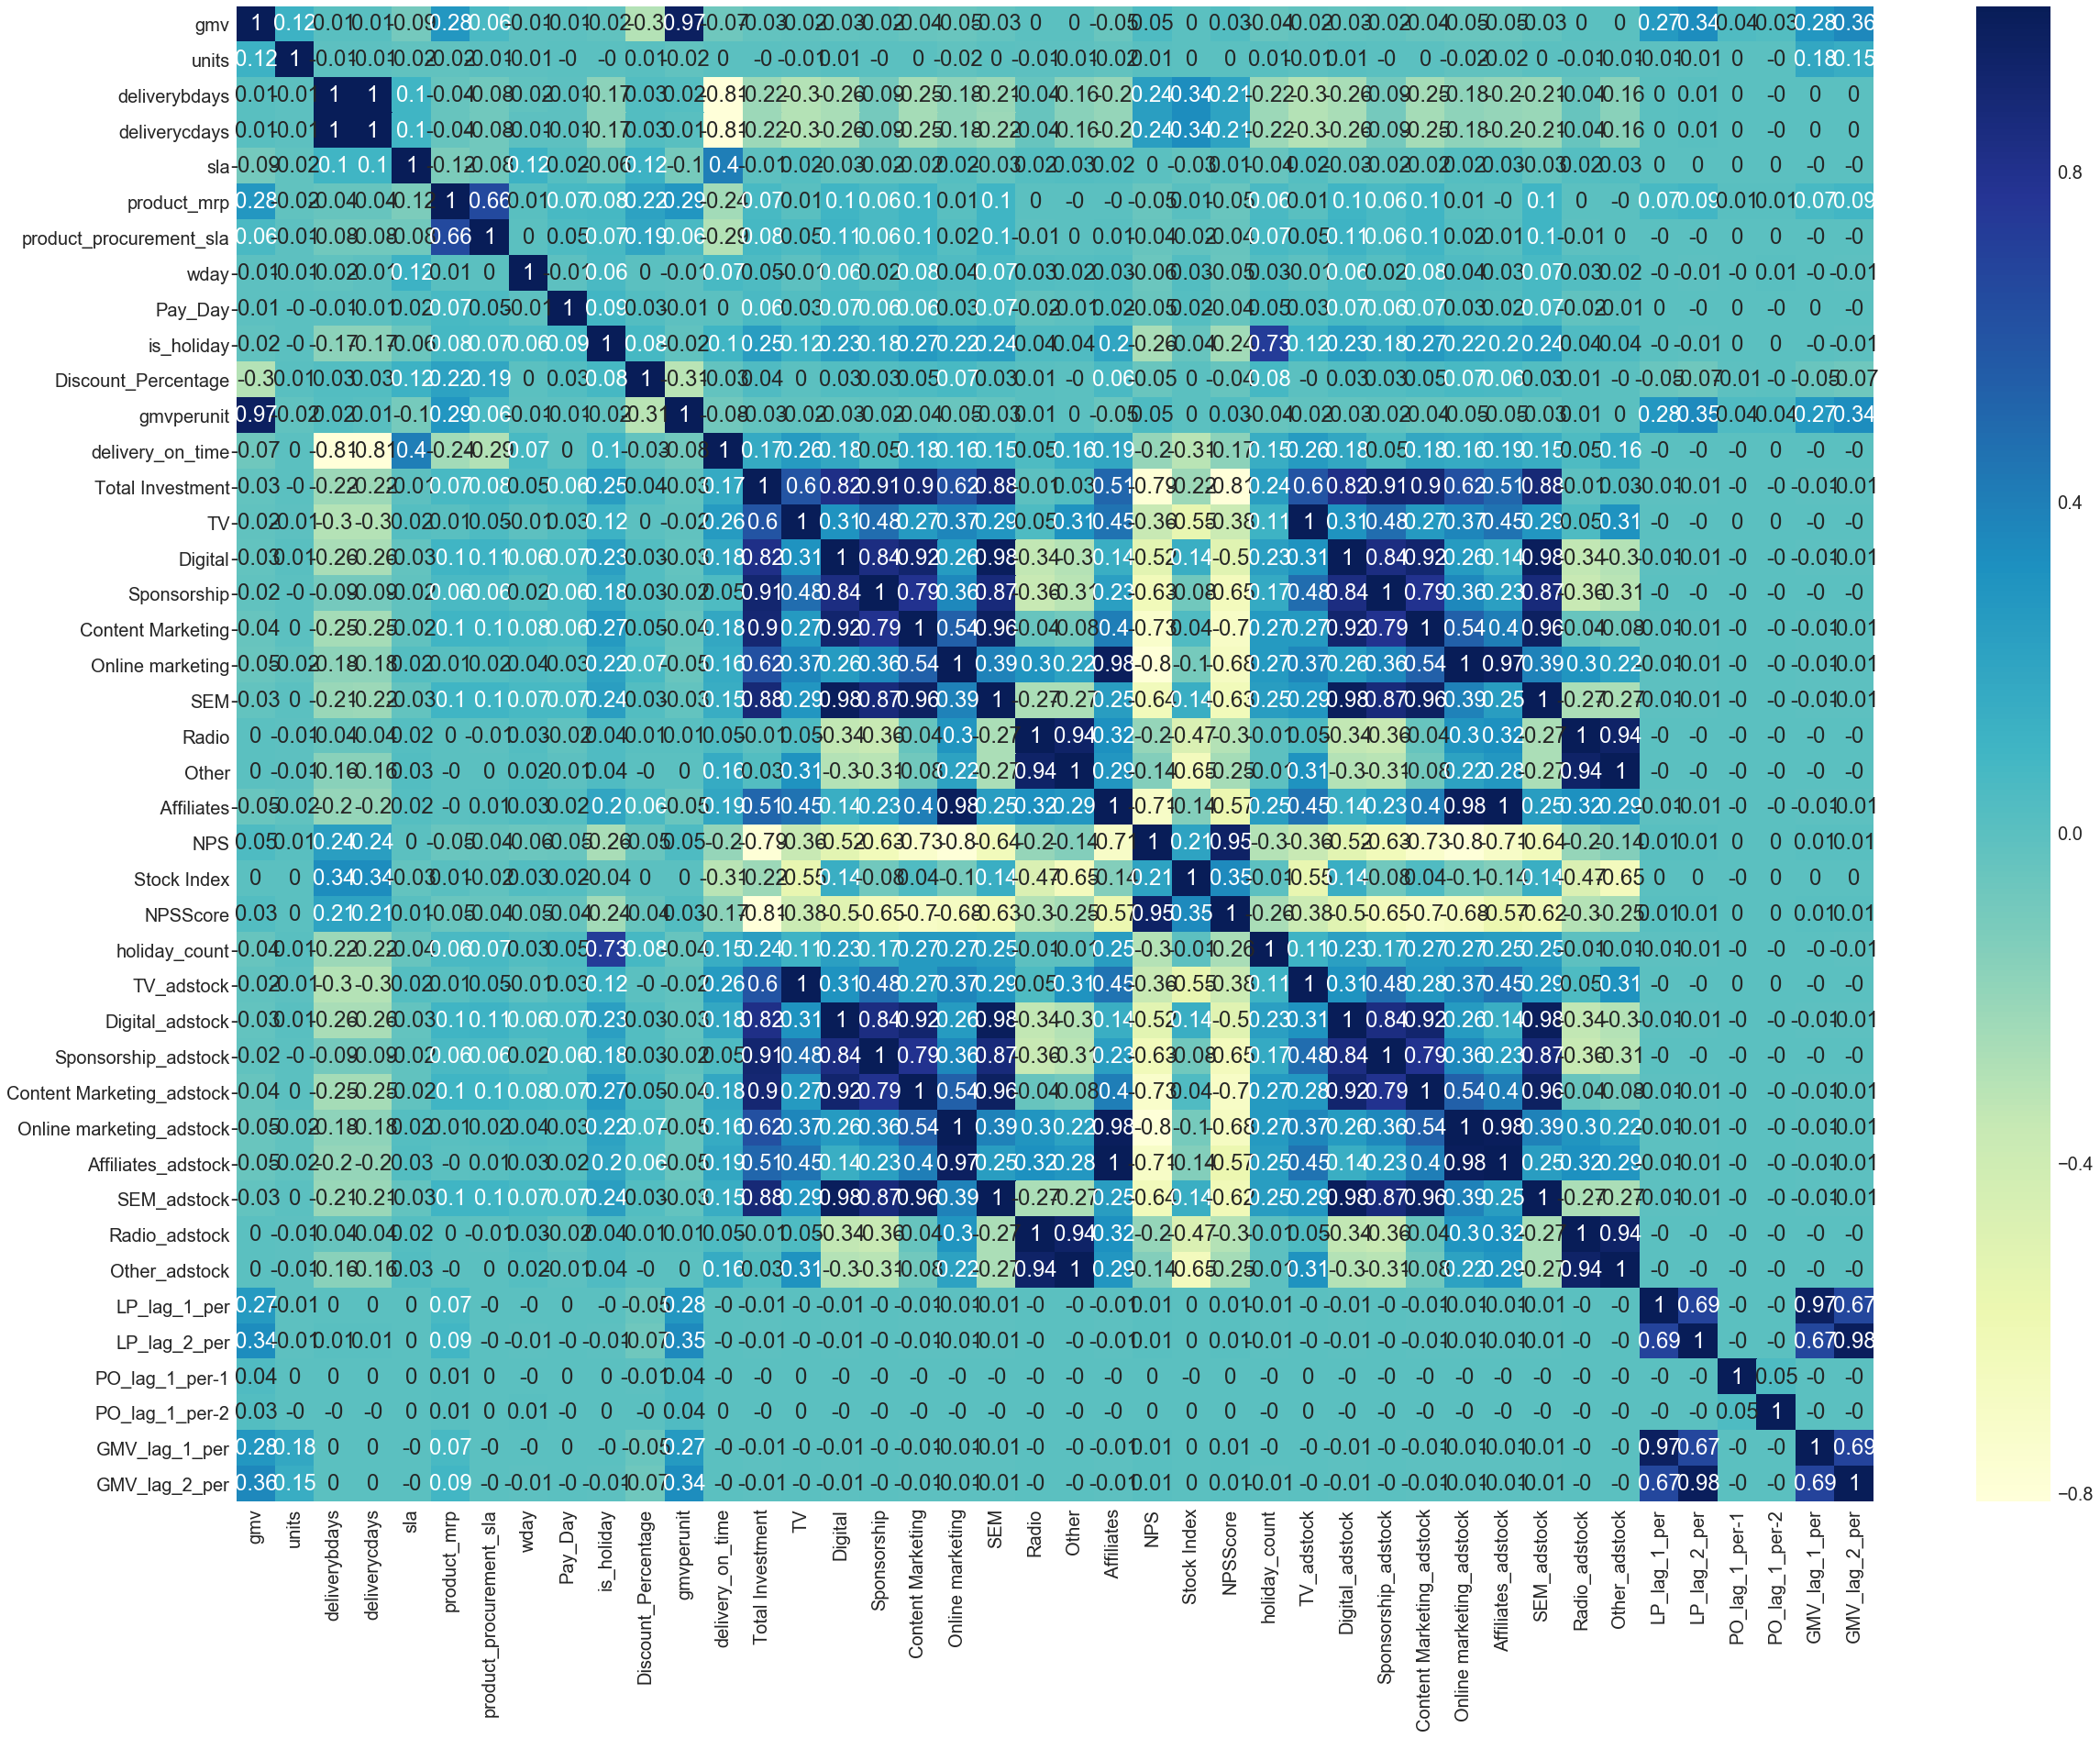

In [9]:
# Plotting a heatmap of the selected variables
plt.figure(figsize=(40, 30))
sns.set(font_scale=2)
sns.heatmap(round(GamingAccessory.corr(), 2), annot=True, cmap="YlGnBu")

In [10]:
GamingAccessory = GamingAccessory.drop(['gmvperunit', 'deliverybdays', 'SEM_adstock', 'Digital_adstock', 
                              'Content Marketing_adstock', 'Affiliates_adstock', 'Radio_adstock', 'Other_adstock', 
                               'Online marketing_adstock', 'Sponsorship_adstock', 'TV_adstock', 
                              'LP_lag_1_per', 'LP_lag_2_per'], axis=1)

GamingAccessory.head()

,gmv,units,deliverycdays,s1_fact_order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,...,Affiliates,NPS,Stock Index,NPSScore,holiday_count,ItemType,PO_lag_1_per-1,PO_lag_1_per-2,GMV_lag_1_per,GMV_lag_2_per
0,"3,075.00",1,0,COD,9,GamingHardware,GamingAccessory,GamePad,"3,999.00",5,...,"15,747,089.60",44.40,1210,10.03,0.00,Luxury,-0.26,-0.16,0.12,0.06
1,"2,750.00",1,0,COD,7,GamingHardware,GamingAccessory,GamePad,"3,999.00",5,...,"15,747,089.60",44.40,1210,10.03,4.00,Luxury,0.14,-0.10,-0.05,0.05
2,"2,899.00",1,0,Prepaid,5,GamingHardware,GamingAccessory,GamePad,"3,999.00",5,...,"15,747,089.60",44.40,1210,10.03,4.00,Luxury,-0.21,-0.10,0.11,0.05
3,"2,609.00",1,0,Prepaid,5,GamingHardware,GamingAccessory,GamePad,"3,999.00",5,...,"15,747,089.60",44.40,1210,10.03,4.00,Luxury,0.13,0.11,-0.06,-0.05
4,"2,772.00",1,0,Prepaid,5,GamingHardware,GamingAccessory,GamePad,"3,999.00",5,...,"15,747,089.60",44.40,1210,10.03,0.00,Luxury,-0.02,0.23,0.01,-0.08


In [11]:
GamingAccessory.columns

Index(['gmv', 'units', 'deliverycdays', 's1_fact_order_payment_type', 'sla',
       'product_analytic_category', 'product_analytic_sub_category',
       'product_analytic_vertical', 'product_mrp', 'product_procurement_sla',
       'wday', 'Pay_Day', 'is_holiday', 'special_sale', 'Discount_Percentage',
       'delivery_on_time', 'delivery_status', 'Total Investment', 'TV',
       'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing',
       'SEM', 'Radio', 'Other', ' Affiliates', 'NPS', 'Stock Index',
       'NPSScore', 'holiday_count', 'ItemType', 'PO_lag_1_per-1',
       'PO_lag_1_per-2', 'GMV_lag_1_per', 'GMV_lag_2_per'],
      dtype='object')

In [12]:
GamingAccessory.isnull().sum()

gmv                              0
units                            0
deliverycdays                    0
s1_fact_order_payment_type       0
sla                              0
product_analytic_category        0
product_analytic_sub_category    0
product_analytic_vertical        0
product_mrp                      0
product_procurement_sla          0
wday                             0
Pay_Day                          0
is_holiday                       0
special_sale                     0
Discount_Percentage              0
delivery_on_time                 0
delivery_status                  0
Total Investment                 0
TV                               0
Digital                          0
Sponsorship                      0
Content Marketing                0
Online marketing                 0
SEM                              0
Radio                            0
Other                            0
 Affiliates                      0
NPS                              0
Stock Index         

In [13]:
GamingAccessory.rename({" Affiliates": "Affiliates"}, axis=1, inplace=True)

In [14]:
GamingAccessory.shape

(170712, 36)

In [15]:
##describe() function alongwith percentiles parameter to get a spread of the data in the numeric columns
GamingAccessory.describe()

,gmv,units,deliverycdays,sla,product_mrp,product_procurement_sla,wday,Pay_Day,is_holiday,Discount_Percentage,...,Other,Affiliates,NPS,Stock Index,NPSScore,holiday_count,PO_lag_1_per-1,PO_lag_1_per-2,GMV_lag_1_per,GMV_lag_2_per
count,"170,712.00","170,712.00","170,712.00","170,712.00","170,712.00","170,712.00","170,712.00","170,712.00","170,712.00","170,712.00",...,"170,712.00","170,712.00","170,712.00","170,712.00","170,712.00","170,712.00","170,712.00","170,712.00","170,712.00","170,712.00"
mean,838.76,1.03,1.33,5.71,"2,021.35",2.56,2.99,0.07,0.20,46.18,...,"11,904,502.32","13,684,660.51",48.37,"1,158.34",11.11,1.15,0.16,0.21,0.09,0.13
std,"1,222.51",0.27,2.64,2.54,"5,389.82",1.79,1.93,0.25,0.40,22.97,...,"20,597,714.25","4,006,399.16",2.69,87.33,0.77,1.65,8.79,9.59,1.28,1.61
min,39.00,1.00,0.00,0.00,120.00,0.00,0.00,0.00,0.00,0.00,...,0.00,"166,383.18",44.40,"1,015.00",10.03,0.00,-1.00,-1.00,-0.99,-0.99
25%,284.00,1.00,0.00,4.00,599.00,2.00,1.00,0.00,0.00,29.07,...,0.00,"14,039,892.47",47.00,"1,052.00",10.63,0.00,0.00,-0.01,0.00,-0.01
50%,449.00,1.00,0.00,6.00,950.00,2.00,3.00,0.00,0.00,45.67,...,0.00,"15,390,121.96",47.31,"1,210.00",10.97,0.00,0.00,0.00,0.00,0.00
75%,924.00,1.00,0.00,7.00,"1,792.00",3.00,5.00,0.00,0.00,62.63,...,"11,260,967.74","15,605,218.38",50.33,"1,228.00",12.09,3.00,0.00,0.00,0.00,0.01
max,"49,999.00",15.00,42.00,60.00,"65,000.00",14.00,6.00,1.00,1.00,98.60,...,"61,170,967.74","16,641,935.48",59.99,"1,242.00",13.55,6.00,"2,998.00","2,998.00",174.85,174.87


In [16]:
GamingAccessory['delivery_on_time'].unique()

array([  4.,   2.,   0.,  -1.,   1.,   5.,   6.,   7.,   8.,   9.,  10.,
        13.,   3.,  11.,  16.,  14.,  -3.,  -2.,  17.,  15.,  12., -13.,
       -12.,  -9., -11.,  -8., -10.,  -7.,  -5.,  -4.,  -6.,  19.,  18.,
       -14.,  21., -15., -16., -61., -19.,  20.,  59., -20., -25., -22.,
       -24., -18., -17., -23., -21., -45., -28., -75., -64., -50., -33.,
       -36.,  24., -29., -27., -44., -39., -26., -34., -31., -30., -37.])

In [17]:
GamingAccessory=GamingAccessory.loc[(GamingAccessory['delivery_on_time']>0)]
GamingAccessory.head()

,gmv,units,deliverycdays,s1_fact_order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,...,Affiliates,NPS,Stock Index,NPSScore,holiday_count,ItemType,PO_lag_1_per-1,PO_lag_1_per-2,GMV_lag_1_per,GMV_lag_2_per
0,"3,075.00",1,0,COD,9,GamingHardware,GamingAccessory,GamePad,"3,999.00",5,...,"15,747,089.60",44.40,1210,10.03,0.00,Luxury,-0.26,-0.16,0.12,0.06
1,"2,750.00",1,0,COD,7,GamingHardware,GamingAccessory,GamePad,"3,999.00",5,...,"15,747,089.60",44.40,1210,10.03,4.00,Luxury,0.14,-0.10,-0.05,0.05
5,"2,750.00",1,0,Prepaid,7,GamingHardware,GamingAccessory,GamePad,"3,999.00",5,...,"15,747,089.60",44.40,1210,10.03,4.00,Luxury,0.25,0.36,-0.08,-0.11
7,"3,079.00",1,0,Prepaid,7,GamingHardware,GamingAccessory,GamePad,"3,999.00",5,...,"15,747,089.60",44.40,1210,10.03,0.00,Luxury,-0.16,-0.26,0.06,0.12
8,"2,899.00",1,0,COD,6,GamingHardware,GamingAccessory,GamePad,"3,999.00",5,...,"15,747,089.60",44.40,1210,10.03,0.00,Luxury,-0.12,0.00,0.05,0.00


In [18]:
GamingAccessory.shape

(106810, 36)

In [19]:
# Subset all categorical variables
GamingAccessory_categorical = GamingAccessory.select_dtypes(include=['object'])
GamingAccessory_categorical.head()

,s1_fact_order_payment_type,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,special_sale,delivery_status,ItemType
0,COD,GamingHardware,GamingAccessory,GamePad,Regular Day,Early,Luxury
1,COD,GamingHardware,GamingAccessory,GamePad,Regular Day,Early,Luxury
5,Prepaid,GamingHardware,GamingAccessory,GamePad,Daussera,Early,Luxury
7,Prepaid,GamingHardware,GamingAccessory,GamePad,Regular Day,Early,Luxury
8,COD,GamingHardware,GamingAccessory,GamePad,Regular Day,Early,Luxury


In [20]:
# Subset all numerical variables
GamingAccessory_numerical = GamingAccessory.select_dtypes(include=['int64','float64'])
GamingAccessory_numerical.head()

,gmv,units,deliverycdays,sla,product_mrp,product_procurement_sla,wday,Pay_Day,is_holiday,Discount_Percentage,...,Other,Affiliates,NPS,Stock Index,NPSScore,holiday_count,PO_lag_1_per-1,PO_lag_1_per-2,GMV_lag_1_per,GMV_lag_2_per
0,"3,075.00",1,0,9,"3,999.00",5,6,0,0,23.11,...,0.00,"15,747,089.60",44.40,1210,10.03,0.00,-0.26,-0.16,0.12,0.06
1,"2,750.00",1,0,7,"3,999.00",5,2,0,0,31.23,...,0.00,"15,747,089.60",44.40,1210,10.03,4.00,0.14,-0.10,-0.05,0.05
5,"2,750.00",1,0,7,"3,999.00",5,4,0,1,31.23,...,0.00,"15,747,089.60",44.40,1210,10.03,4.00,0.25,0.36,-0.08,-0.11
7,"3,079.00",1,0,7,"3,999.00",5,5,0,0,23.01,...,0.00,"15,747,089.60",44.40,1210,10.03,0.00,-0.16,-0.26,0.06,0.12
8,"2,899.00",1,0,6,"3,999.00",5,0,0,0,27.51,...,0.00,"15,747,089.60",44.40,1210,10.03,0.00,-0.12,0.00,0.05,0.00


In [21]:
# Convert into dummies
dummies = pd.get_dummies(GamingAccessory_categorical, drop_first=True)
dummies.head()

,s1_fact_order_payment_type_Prepaid,product_analytic_vertical_GameControlMount,product_analytic_vertical_GamePad,product_analytic_vertical_GamingAccessoryKit,product_analytic_vertical_GamingAdapter,product_analytic_vertical_GamingChargingStation,product_analytic_vertical_GamingHeadset,product_analytic_vertical_GamingKeyboard,product_analytic_vertical_GamingMemoryCard,product_analytic_vertical_GamingMouse,...,special_sale_Christmas & New Year,special_sale_Daussera,special_sale_Diwali,special_sale_Eid & Rathayatra,special_sale_FHSD,special_sale_Pacman,special_sale_Regular Day,special_sale_Republic Day,special_sale_Valentine Day,ItemType_MassMarket
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,1,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [22]:
# Drop categorical variable columns
GamingAccessory = GamingAccessory.drop(list(GamingAccessory_categorical.columns), axis=1)

In [23]:
GamingAccessory.head()

,gmv,units,deliverycdays,sla,product_mrp,product_procurement_sla,wday,Pay_Day,is_holiday,Discount_Percentage,...,Other,Affiliates,NPS,Stock Index,NPSScore,holiday_count,PO_lag_1_per-1,PO_lag_1_per-2,GMV_lag_1_per,GMV_lag_2_per
0,"3,075.00",1,0,9,"3,999.00",5,6,0,0,23.11,...,0.00,"15,747,089.60",44.40,1210,10.03,0.00,-0.26,-0.16,0.12,0.06
1,"2,750.00",1,0,7,"3,999.00",5,2,0,0,31.23,...,0.00,"15,747,089.60",44.40,1210,10.03,4.00,0.14,-0.10,-0.05,0.05
5,"2,750.00",1,0,7,"3,999.00",5,4,0,1,31.23,...,0.00,"15,747,089.60",44.40,1210,10.03,4.00,0.25,0.36,-0.08,-0.11
7,"3,079.00",1,0,7,"3,999.00",5,5,0,0,23.01,...,0.00,"15,747,089.60",44.40,1210,10.03,0.00,-0.16,-0.26,0.06,0.12
8,"2,899.00",1,0,6,"3,999.00",5,0,0,0,27.51,...,0.00,"15,747,089.60",44.40,1210,10.03,0.00,-0.12,0.00,0.05,0.00


In [24]:
# Concatenate dummy variables with X
GA = pd.concat([GamingAccessory, dummies], axis=1)
GA.head()

,gmv,units,deliverycdays,sla,product_mrp,product_procurement_sla,wday,Pay_Day,is_holiday,Discount_Percentage,...,special_sale_Christmas & New Year,special_sale_Daussera,special_sale_Diwali,special_sale_Eid & Rathayatra,special_sale_FHSD,special_sale_Pacman,special_sale_Regular Day,special_sale_Republic Day,special_sale_Valentine Day,ItemType_MassMarket
0,"3,075.00",1,0,9,"3,999.00",5,6,0,0,23.11,...,0,0,0,0,0,0,1,0,0,0
1,"2,750.00",1,0,7,"3,999.00",5,2,0,0,31.23,...,0,0,0,0,0,0,1,0,0,0
5,"2,750.00",1,0,7,"3,999.00",5,4,0,1,31.23,...,0,1,0,0,0,0,0,0,0,0
7,"3,079.00",1,0,7,"3,999.00",5,5,0,0,23.01,...,0,0,0,0,0,0,1,0,0,0
8,"2,899.00",1,0,6,"3,999.00",5,0,0,0,27.51,...,0,0,0,0,0,0,1,0,0,0


In [25]:
GA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106810 entries, 0 to 170711
Data columns (total 55 columns):
gmv                                                106810 non-null float64
units                                              106810 non-null int64
deliverycdays                                      106810 non-null int64
sla                                                106810 non-null int64
product_mrp                                        106810 non-null float64
product_procurement_sla                            106810 non-null int64
wday                                               106810 non-null int64
Pay_Day                                            106810 non-null int64
is_holiday                                         106810 non-null int64
Discount_Percentage                                106810 non-null float64
delivery_on_time                                   106810 non-null float64
Total Investment                                   106810 non-null float64
TV 

In [26]:
# missing information
GA.isnull().any()

gmv                                                False
units                                              False
deliverycdays                                      False
sla                                                False
product_mrp                                        False
product_procurement_sla                            False
wday                                               False
Pay_Day                                            False
is_holiday                                         False
Discount_Percentage                                False
delivery_on_time                                   False
Total Investment                                   False
TV                                                 False
Digital                                            False
Sponsorship                                        False
Content Marketing                                  False
Online marketing                                   False
SEM                            

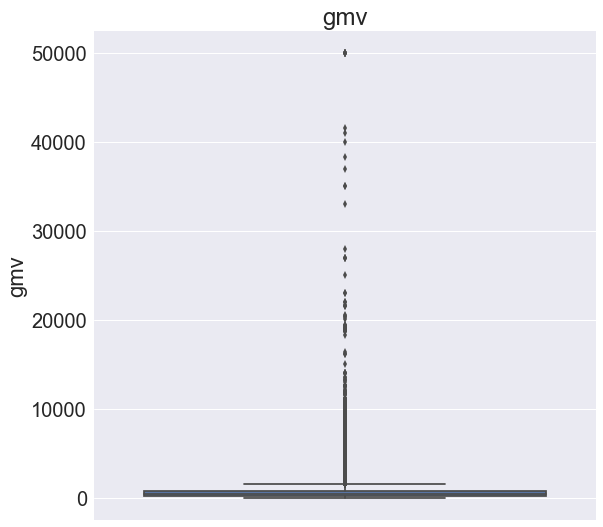

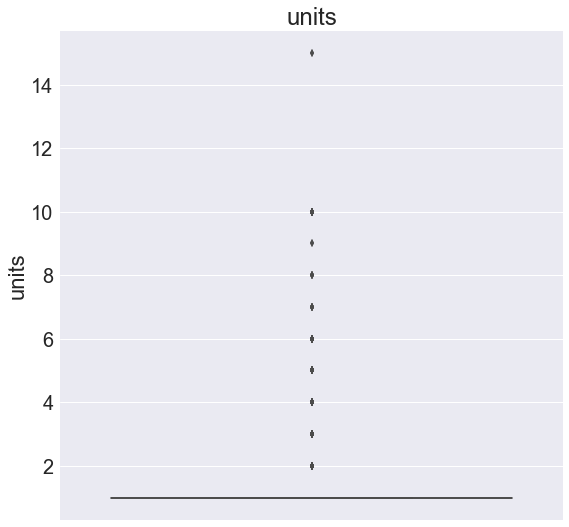

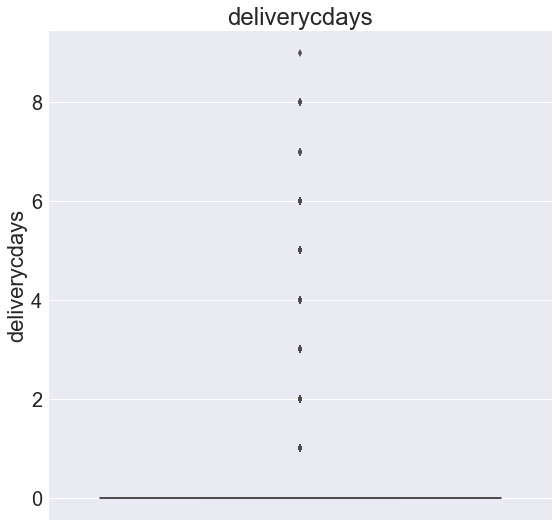

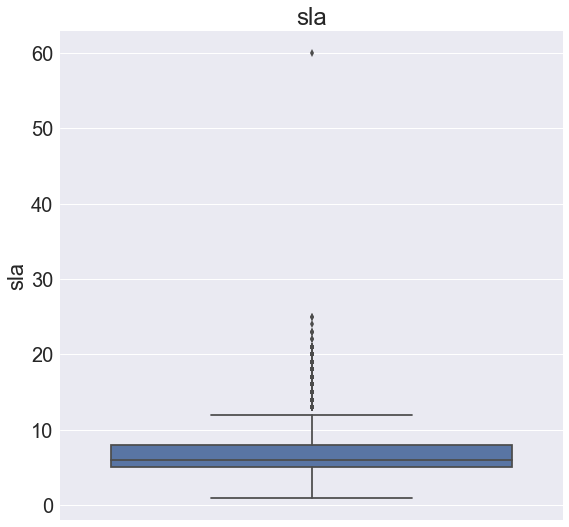

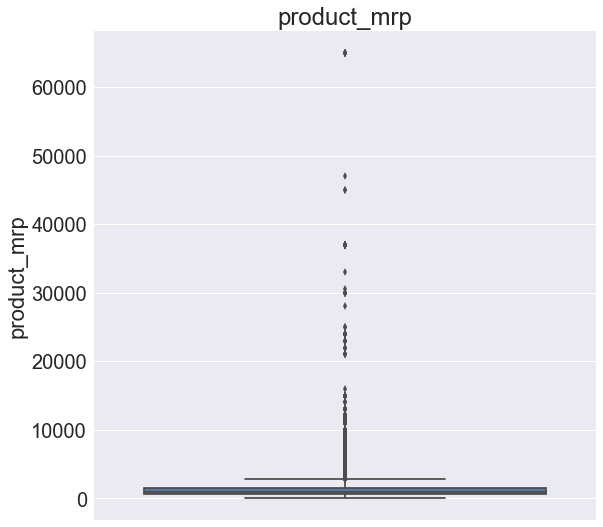

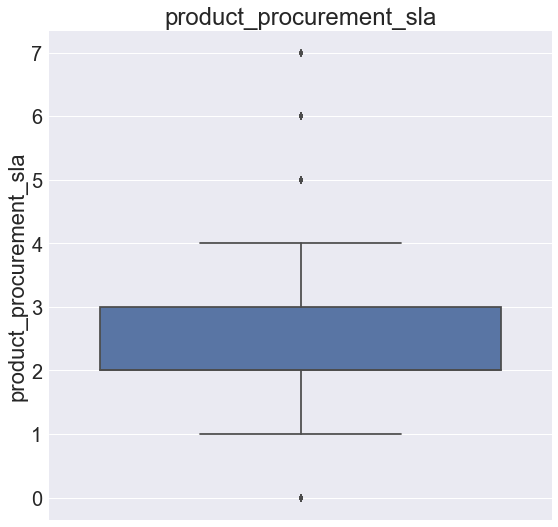

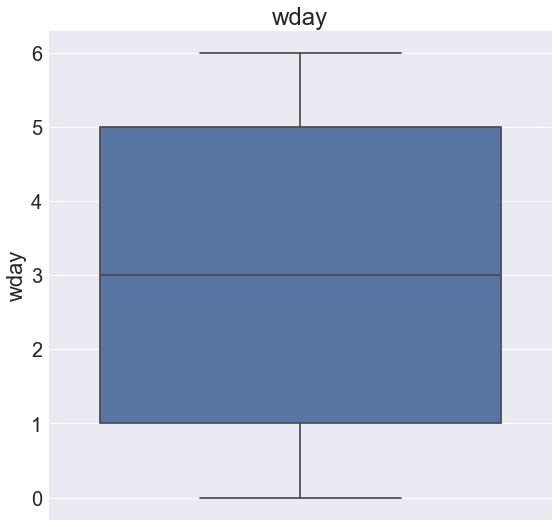

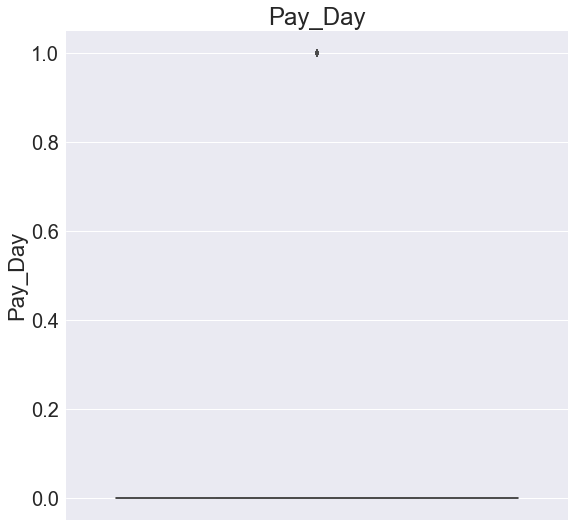

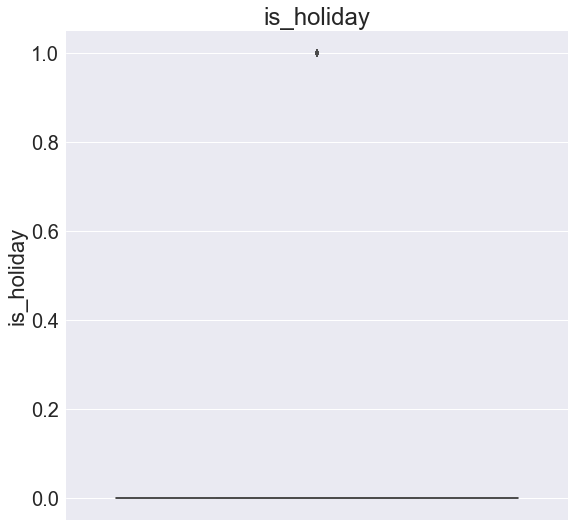

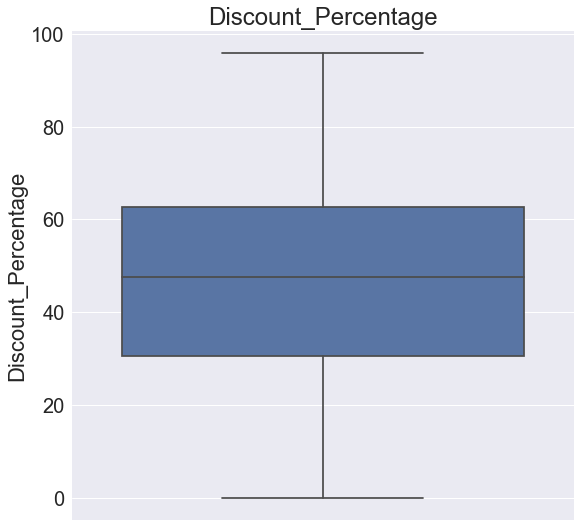

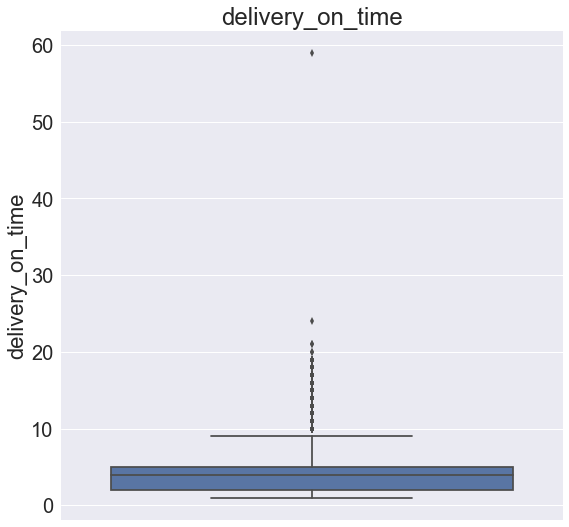

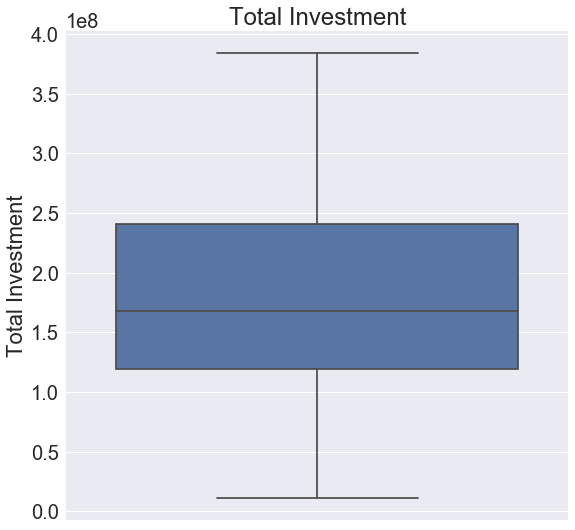

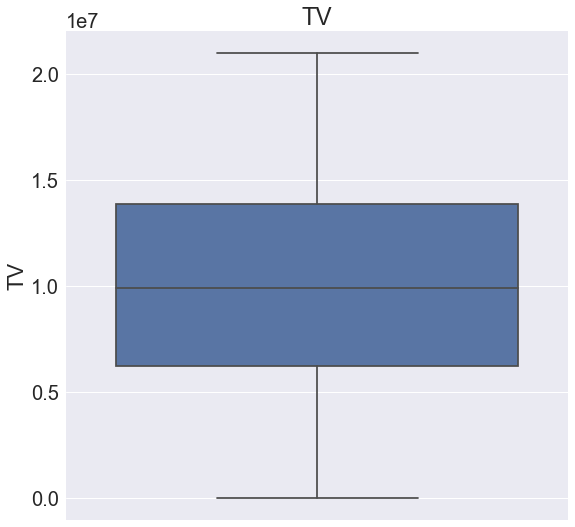

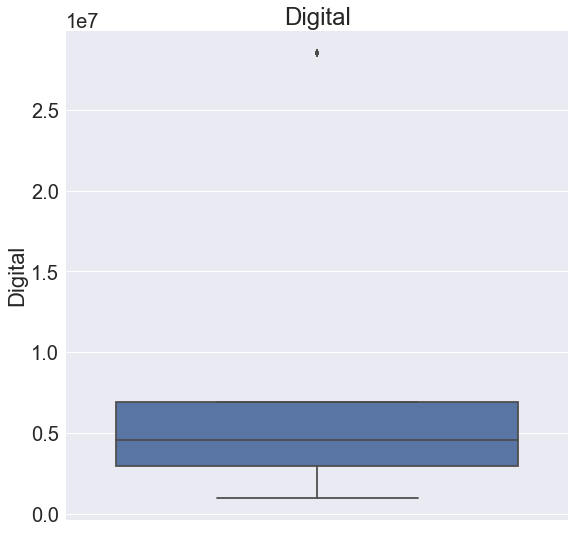

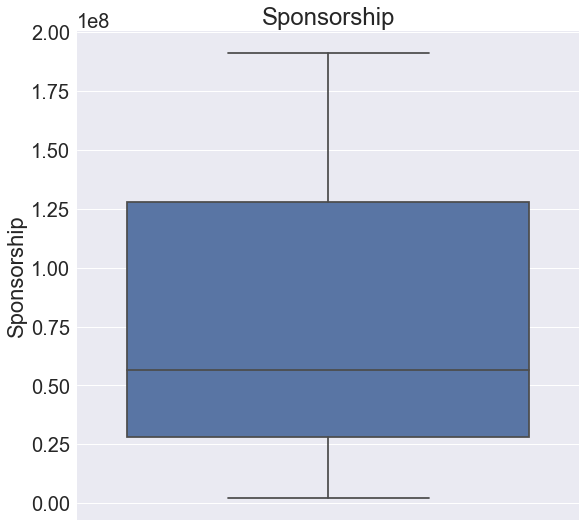

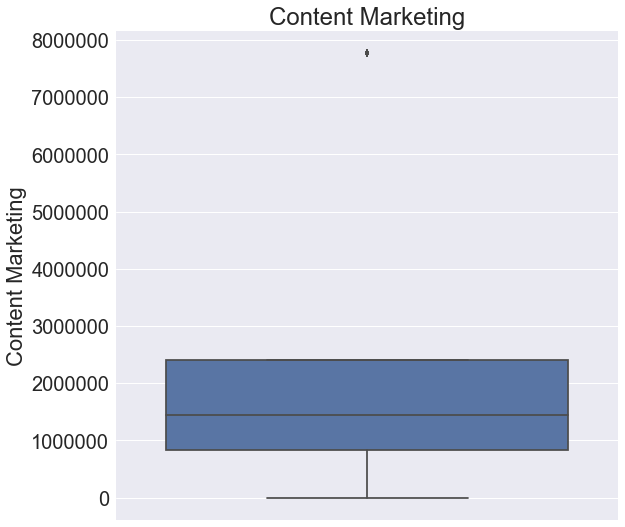

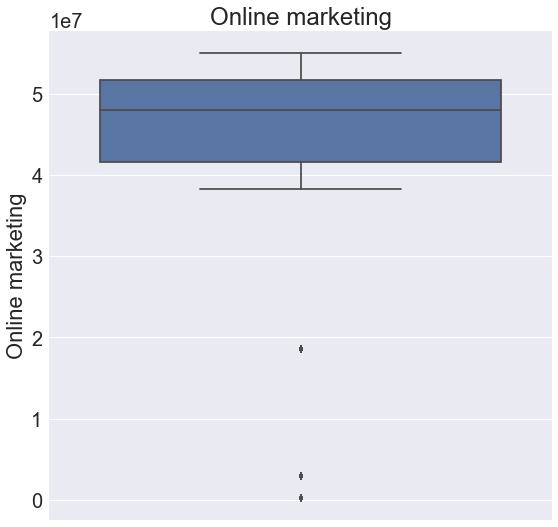

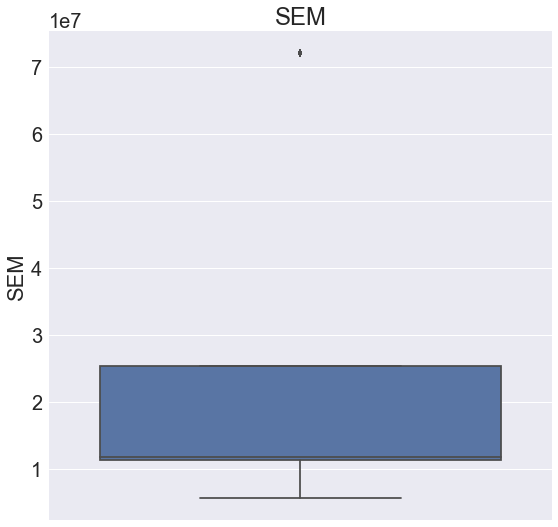

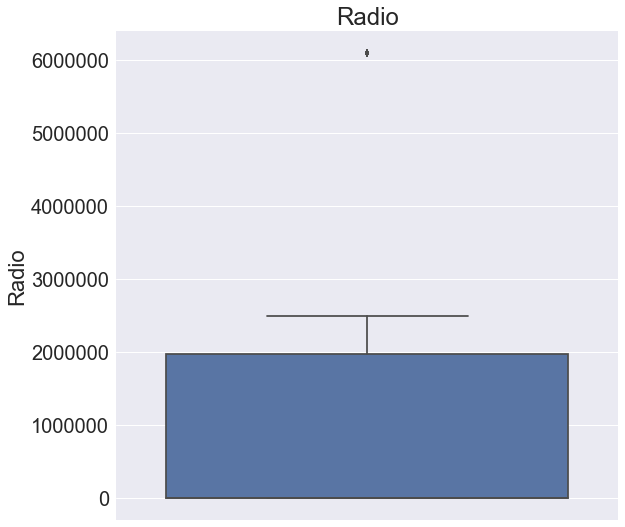

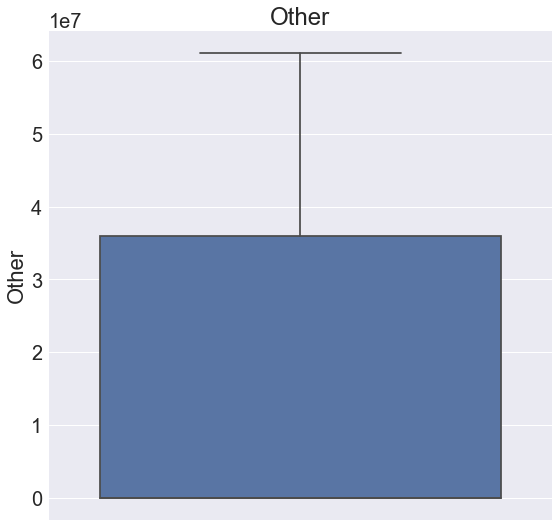

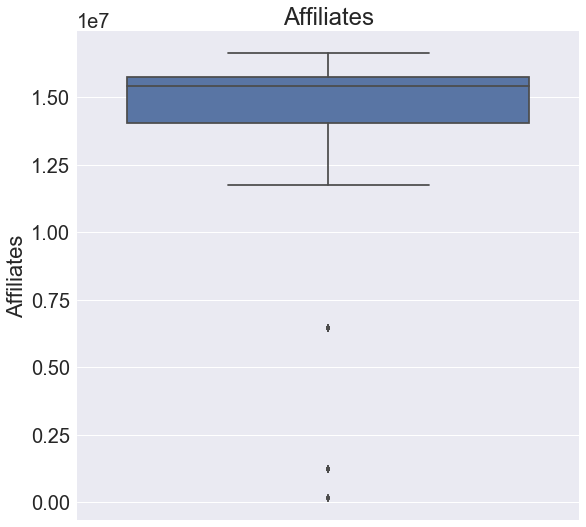

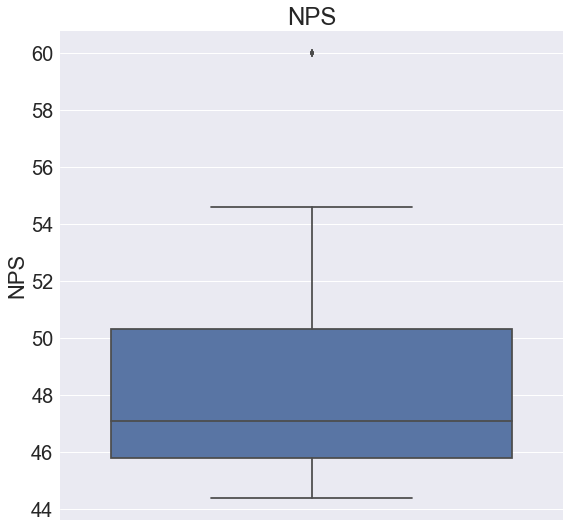

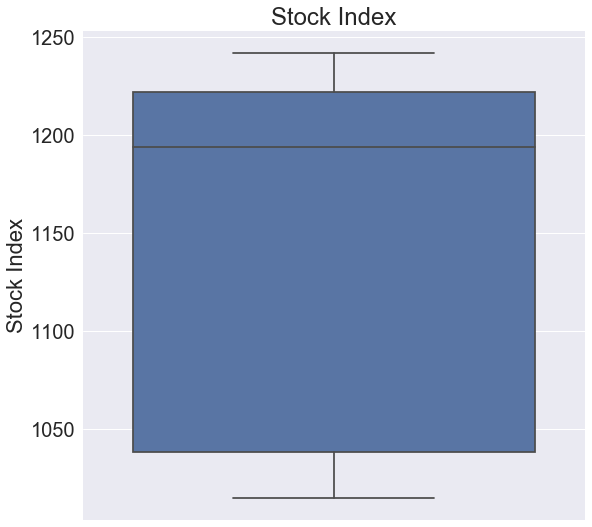

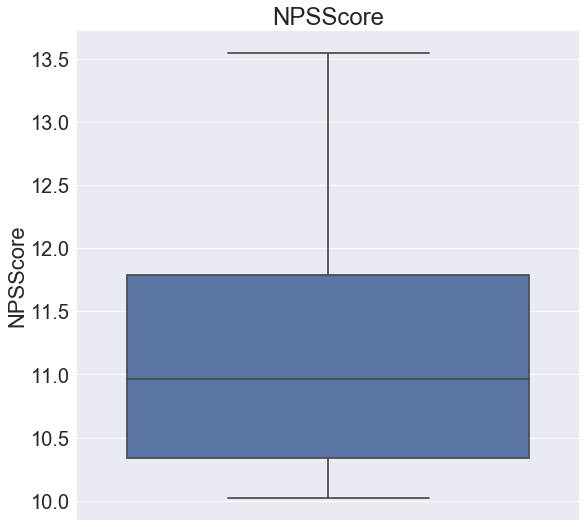

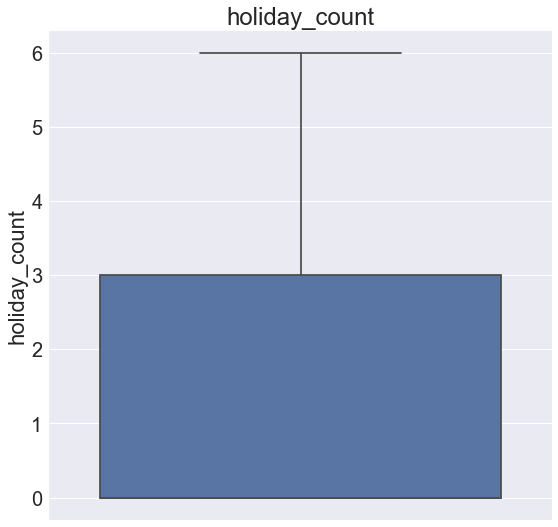

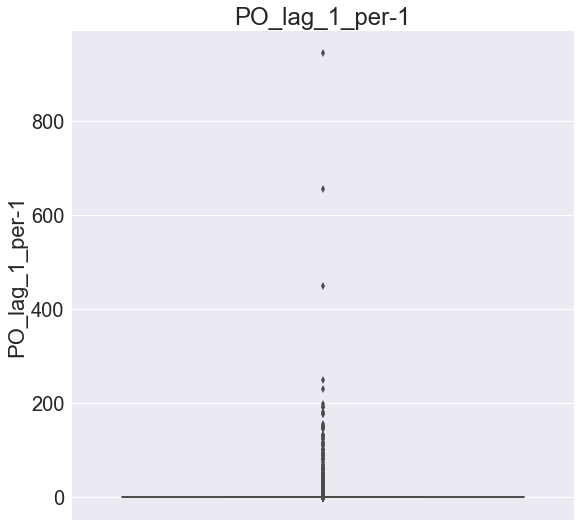

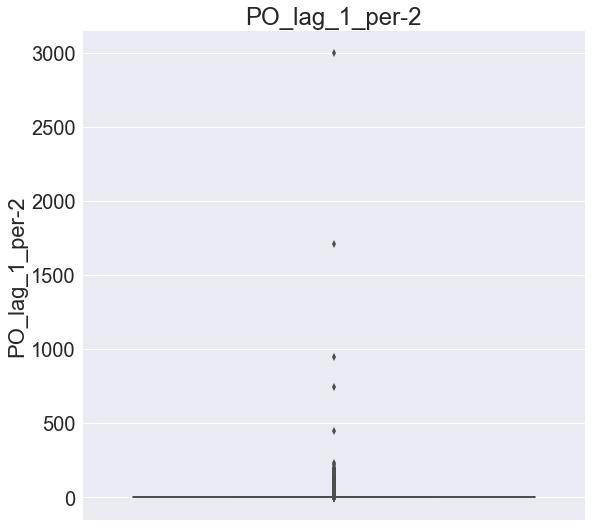

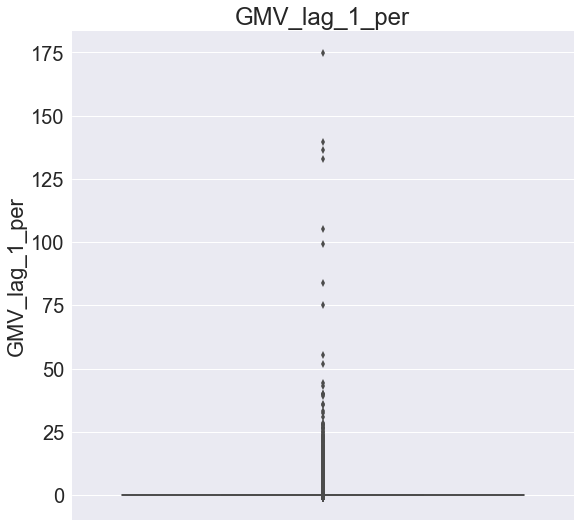

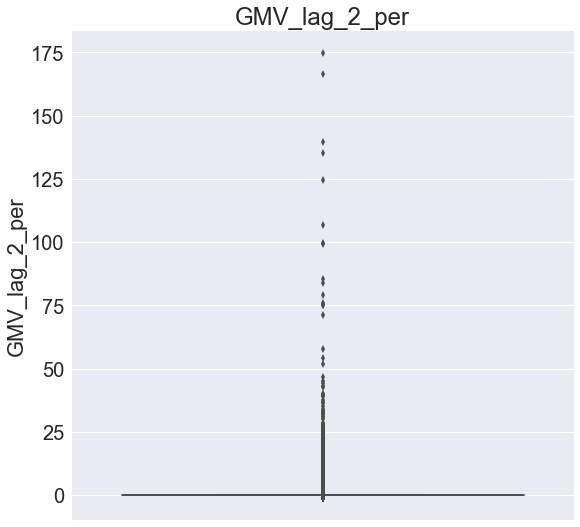

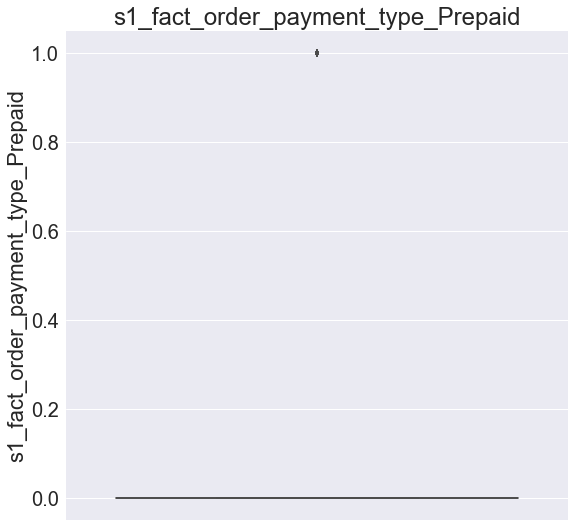

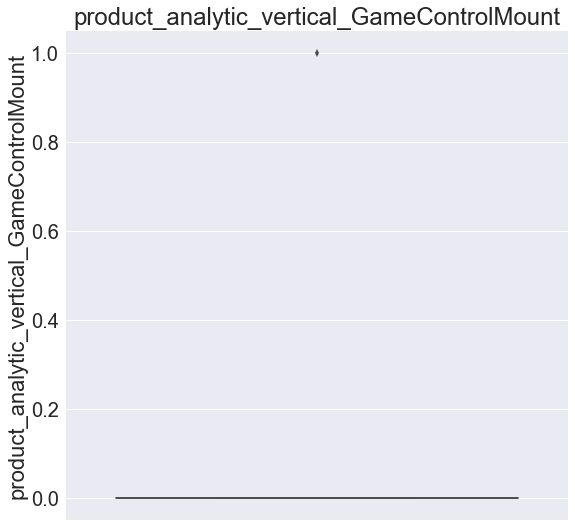

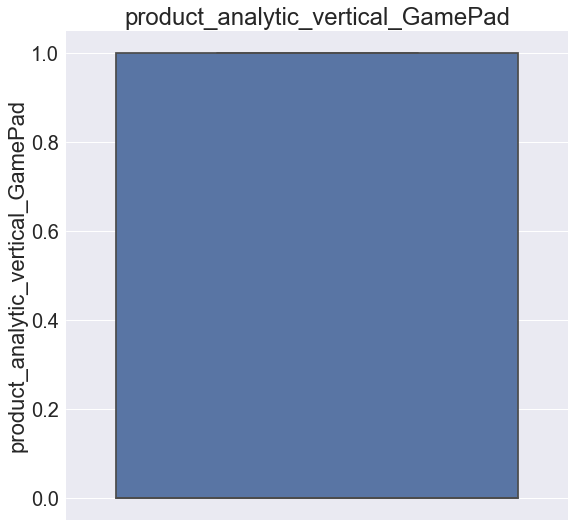

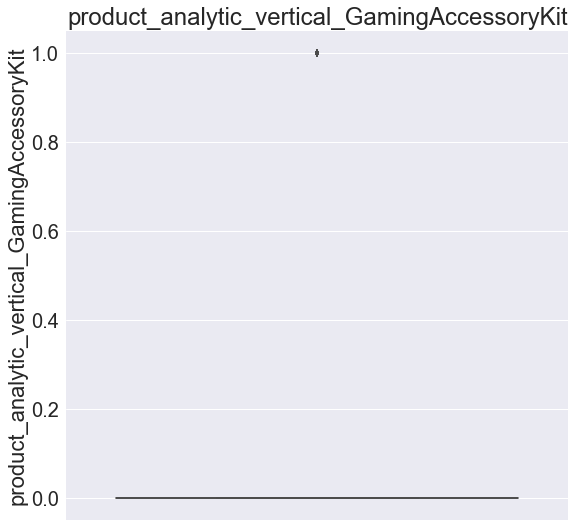

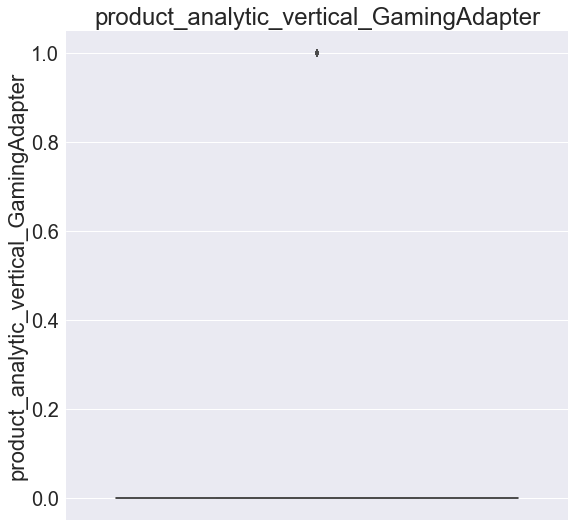

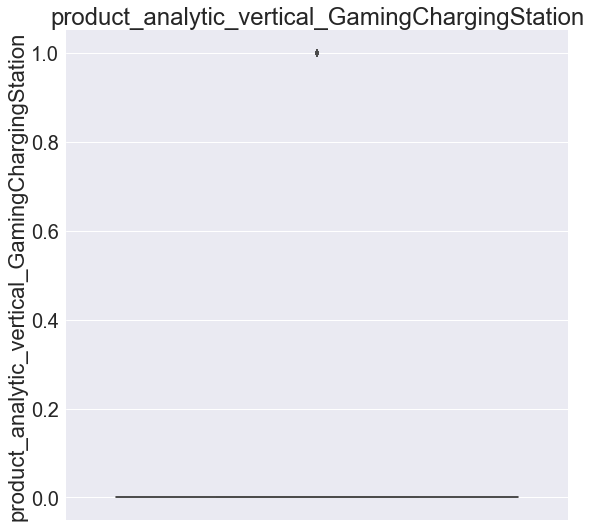

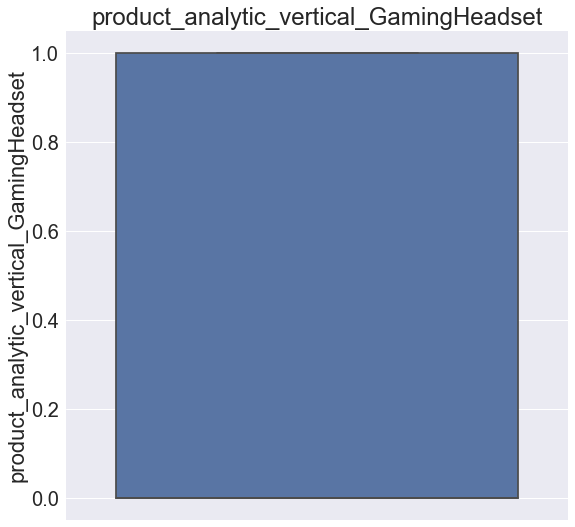

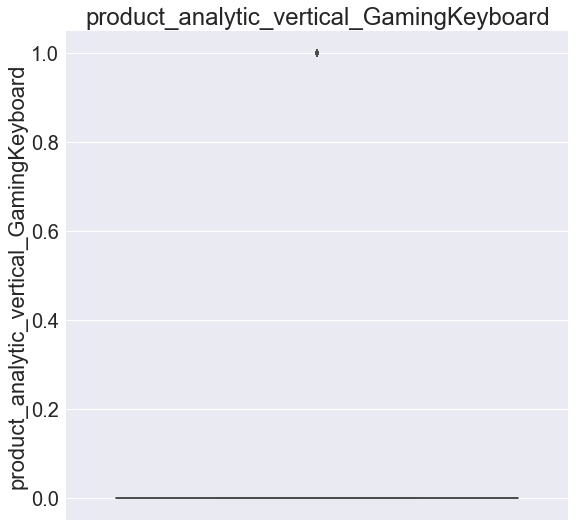

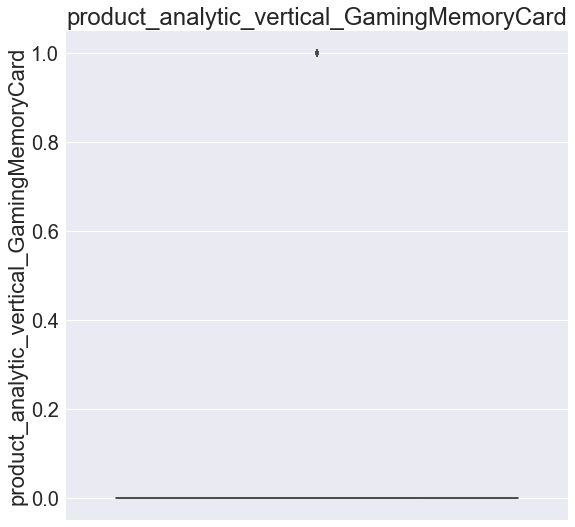

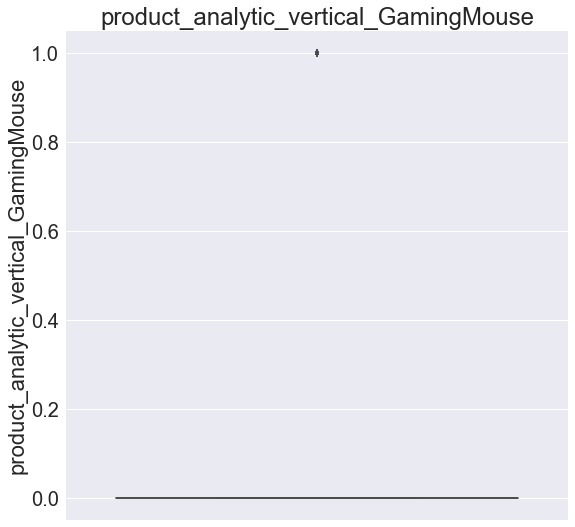

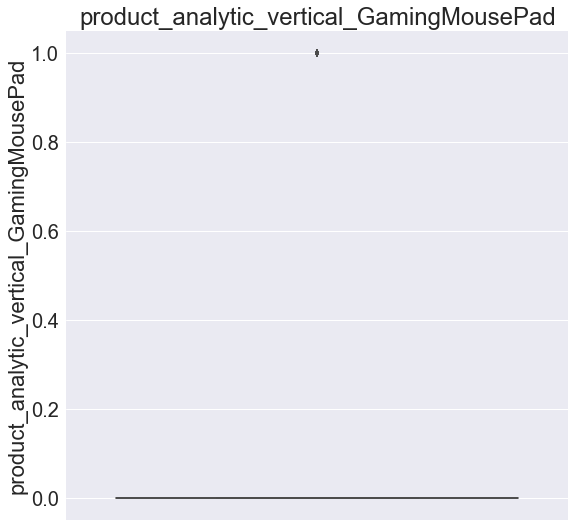

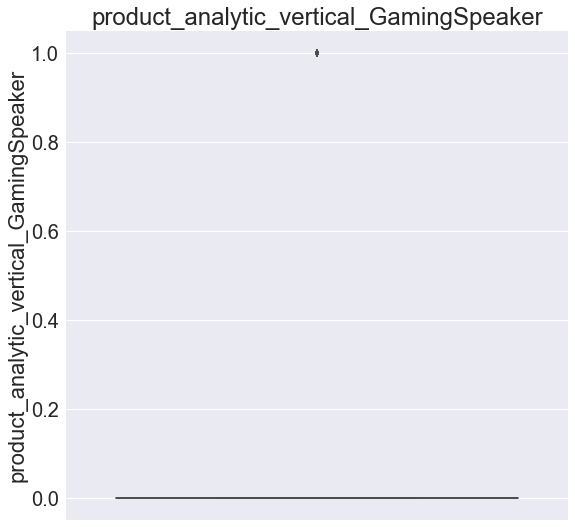

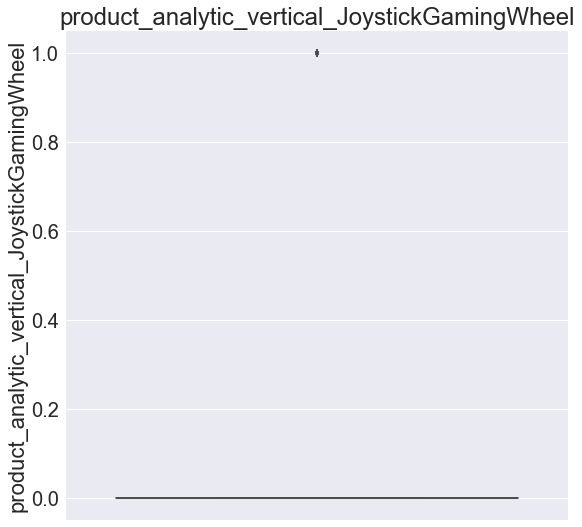

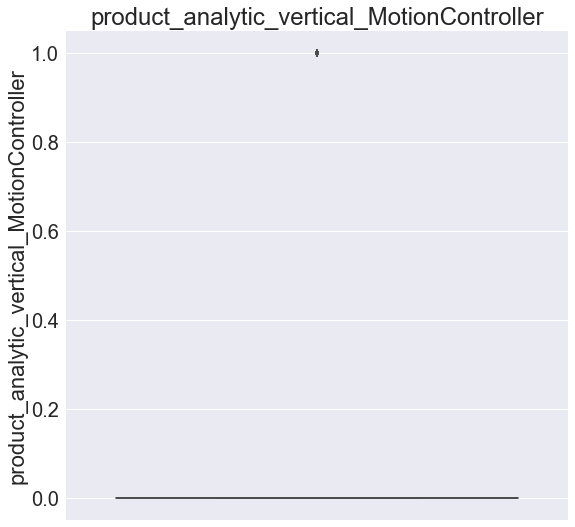

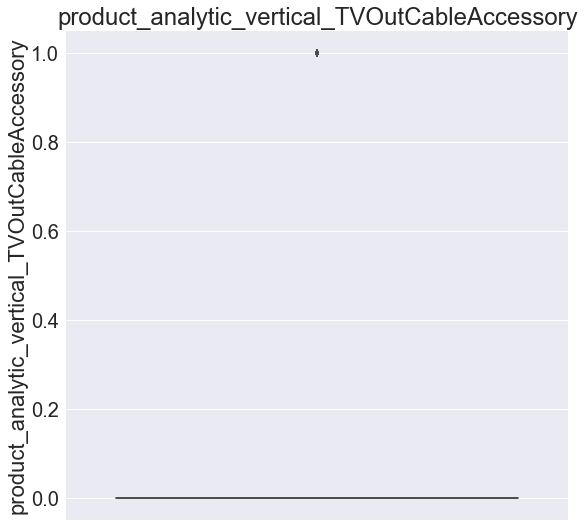

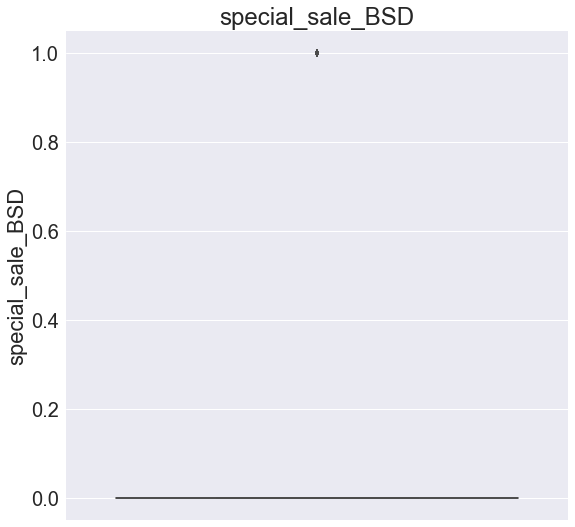

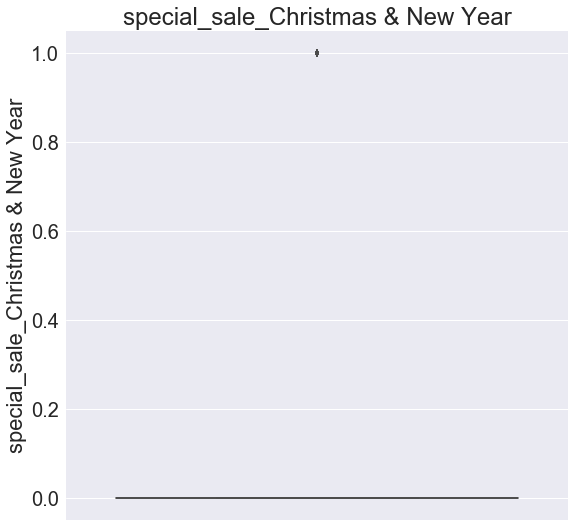

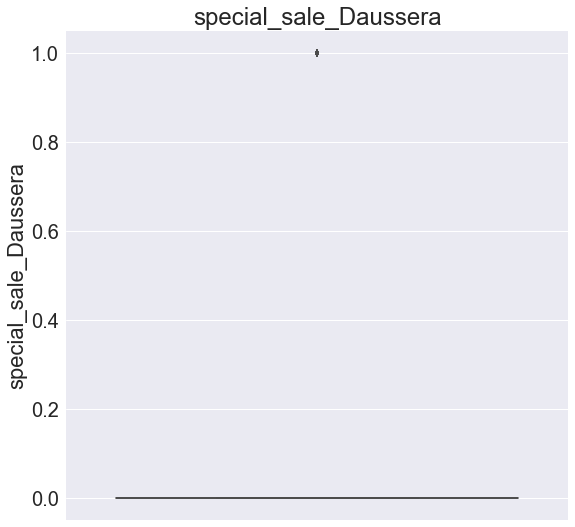

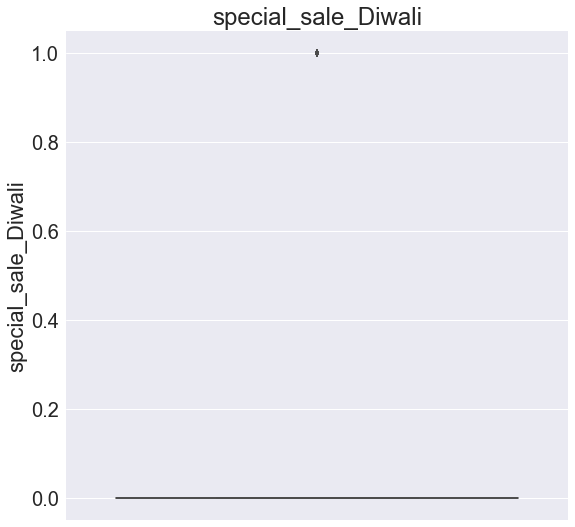

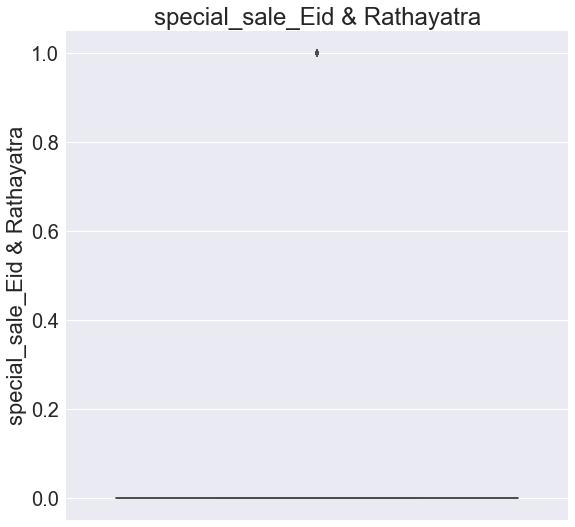

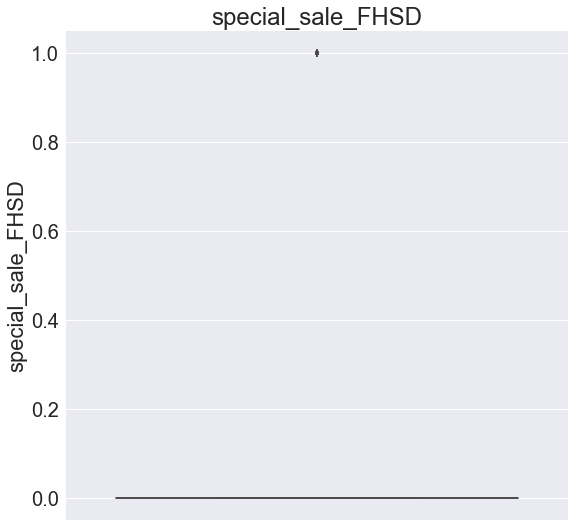

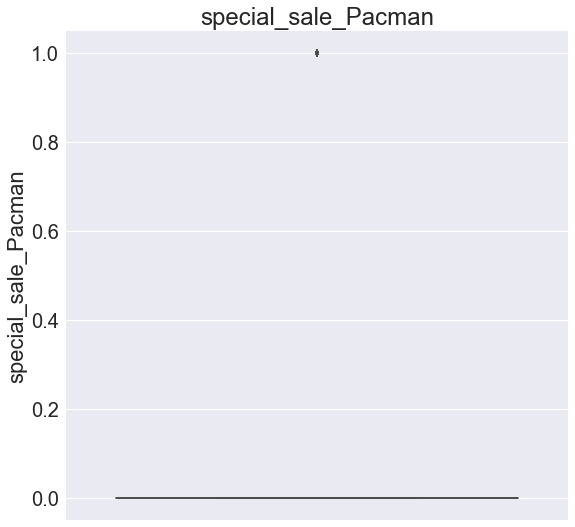

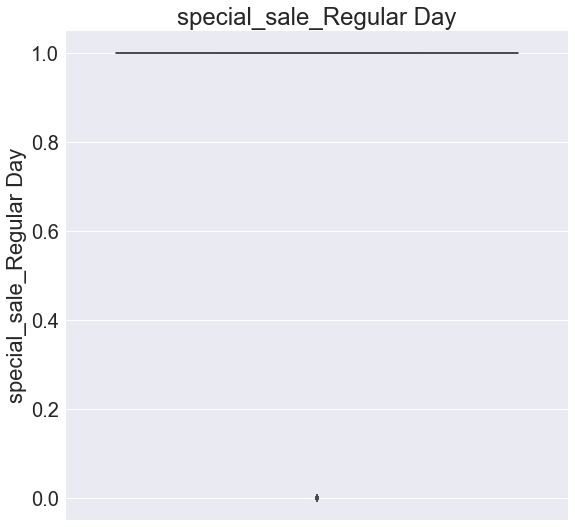

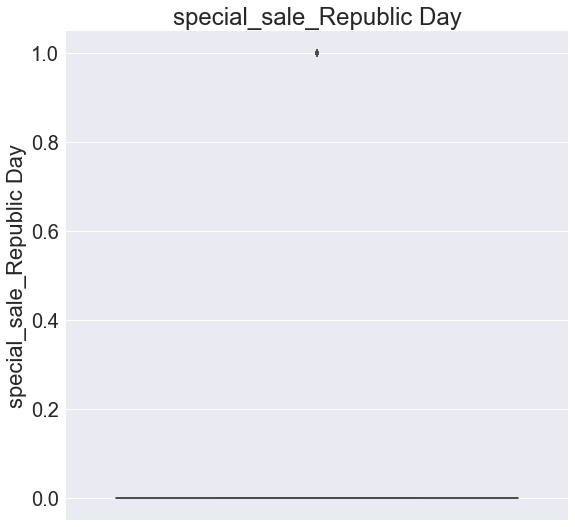

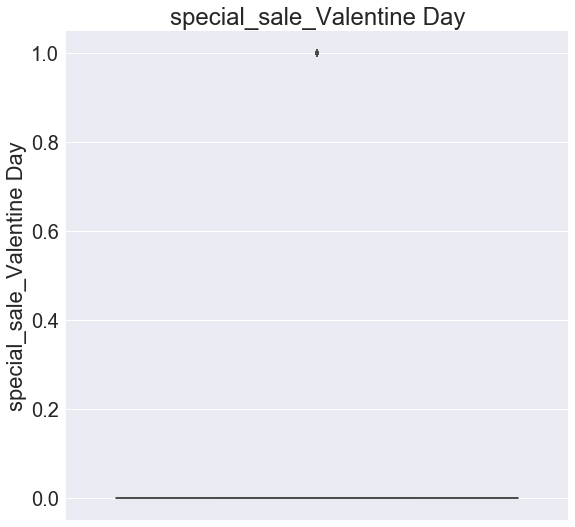

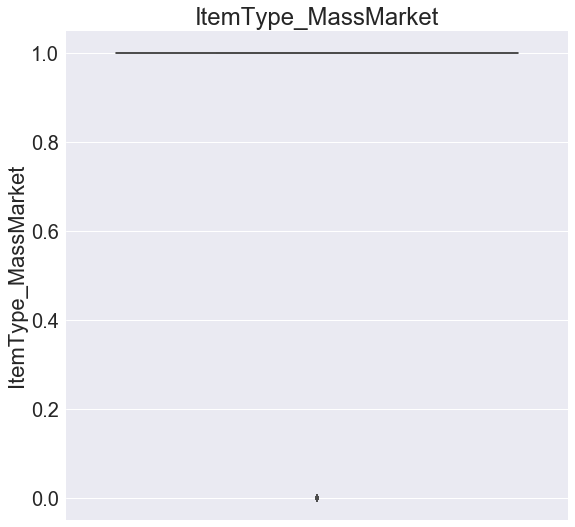

In [27]:
for col in list(GA.columns):
    plt.figure(figsize=(9,9))
    sns.boxplot(data=GA, y=col).set_title(col)
    

In [28]:
''''def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out'''''

"'def remove_outlier(df_in, col_name):\n    q1 = df_in[col_name].quantile(0.25)\n    q3 = df_in[col_name].quantile(0.75)\n    iqr = q3-q1 #Interquartile range\n    fence_low  = q1-1.5*iqr\n    fence_high = q3+1.5*iqr\n    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]\n    return df_out"

In [29]:
'''''outlier_cols = ['gmv', 'units', 'deliverycdays', 'sla', 'product_mrp', 'delivery_on_time', 
               'Online marketing', 'SEM', 'Affiliates', 'Digital', 'Content Marketing', 'Radio']'''''

"''outlier_cols = ['gmv', 'units', 'deliverycdays', 'sla', 'product_mrp', 'delivery_on_time', \n               'Online marketing', 'SEM', 'Affiliates', 'Digital', 'Content Marketing', 'Radio']"

In [30]:
 '''''   for col in outlier_cols:
        remove_outlier(GA, col)'''''

"''   for col in outlier_cols:\n       remove_outlier(GA, col)"

In [31]:
GA.shape

(106810, 55)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
df_train, df_test = train_test_split(GA, train_size=0.7, test_size=0.3, random_state=100)

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
scaler = MinMaxScaler()

In [36]:
GA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106810 entries, 0 to 170711
Data columns (total 55 columns):
gmv                                                106810 non-null float64
units                                              106810 non-null int64
deliverycdays                                      106810 non-null int64
sla                                                106810 non-null int64
product_mrp                                        106810 non-null float64
product_procurement_sla                            106810 non-null int64
wday                                               106810 non-null int64
Pay_Day                                            106810 non-null int64
is_holiday                                         106810 non-null int64
Discount_Percentage                                106810 non-null float64
delivery_on_time                                   106810 non-null float64
Total Investment                                   106810 non-null float64
TV 

In [37]:
GA['gmv'].unique()

array([3075., 2750., 3079., ..., 7183.,   82.,   42.])

In [38]:
# Create a list of the variables that you need to scale
varlist1 = []
dum_cols = list(dummies.columns)
dum_cols.append('Pay_Day')
dum_cols.append('is_holiday')

for col in GA.columns:
    if col not in dum_cols:
        varlist1.append(col)

In [39]:
# Scale these variables using 'fit_transform'
df_train[varlist1] = scaler.fit_transform(df_train[varlist1])

In [40]:
df_train.head()

,gmv,units,deliverycdays,sla,product_mrp,product_procurement_sla,wday,Pay_Day,is_holiday,Discount_Percentage,...,special_sale_Christmas & New Year,special_sale_Daussera,special_sale_Diwali,special_sale_Eid & Rathayatra,special_sale_FHSD,special_sale_Pacman,special_sale_Regular Day,special_sale_Republic Day,special_sale_Valentine Day,ItemType_MassMarket
36102,0.01,0.00,0.00,0.25,0.03,0.71,0.00,0,0,0.72,...,0,0,0,0,0,0,1,0,0,1
98899,0.02,0.00,0.00,0.12,0.03,0.00,0.17,0,1,0.47,...,0,0,0,0,0,0,0,0,0,1
93860,0.01,0.07,0.00,0.21,0.00,0.14,0.17,0,0,0.33,...,0,0,0,0,0,0,1,0,0,1
637,0.01,0.00,0.00,0.29,0.03,0.71,0.67,0,0,0.73,...,0,0,0,0,0,0,1,0,0,1
41231,0.01,0.00,0.00,0.21,0.02,0.14,0.67,0,1,0.62,...,1,0,0,0,0,0,0,0,0,1


In [41]:
# Split the train dataset into X and y
y_train = df_train.pop('gmv')
X_train = df_train

In [42]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 1.42190011e-01 -2.30633362e-02  3.13522724e-02  7.61270175e-01
 -6.76478069e-03  2.35145493e-05  1.76165280e-04 -7.27651321e-04
 -2.50719700e-02 -2.68969140e-02 -8.73772779e+07  2.96581713e+07
  6.00377311e+07  3.93121431e+07  4.76159985e+07 -1.86322781e+06
 -9.03460182e+07  4.93672790e+07 -4.44023030e+07  5.68507880e+06
  1.08704822e+07  9.18794088e+05 -2.25664905e+07 -1.20058747e-05
 -6.23555703e-03 -1.08471751e-02  2.27006484e-02  1.26572033e-01
 -4.33895026e-05  8.44425012e-04 -1.77042020e-03  3.55132343e-04
  7.11628131e-04 -6.51462194e-04 -5.43060245e-04 -3.74305334e-04
  4.33487328e-04 -6.26266331e-04 -8.96171098e-04 -1.16408872e-02
  2.67713887e-03  1.42675748e-03 -1.01850172e-03  9.58951327e-04
 -5.56122997e-04  6.56254866e-04  7.54607483e-04  1.42011321e-03
  8.27233578e-04  1.25022682e-03 -2.36761512e-04  1.37029168e-03
  6.94642330e-04 -1.27115037e-02]
6866252.347534175


In [44]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 15 features
lm = LinearRegression()
rfe1 = RFE(lm, 15)

# Fit with 15 features
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_)  

[ True False False  True False False False False  True False  True False
  True  True  True  True  True  True  True  True  True False  True False
 False False False  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False]
[ 1 10  6  1 11 39 37 28  1  7  1  9  1  1  1  1  1  1  1  1  1  8  1 40
 12  5  2  1 38 15 16 20 17 34 35 36 19 33 32  4 13 14 30 23 29 27 26 21
 24 22 31 18 25  3]


In [45]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 15 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,units,product_mrp,Discount_Percentage,Total Investment,Digital,Sponsorship,Content Marketing,Online marketing,SEM,Radio,Other,Affiliates,NPS,NPSScore,GMV_lag_2_per
36102,1.00,0.00,0.03,0.72,0.62,0.21,0.67,0.31,0.92,0.29,0.00,0.00,0.93,0.09,0.09,0.01
98899,1.00,0.00,0.03,0.47,0.58,0.14,0.48,0.11,0.76,0.09,0.32,0.59,0.84,0.30,0.30,0.00
93860,1.00,0.07,0.00,0.33,0.58,0.14,0.48,0.11,0.76,0.09,0.32,0.59,0.84,0.30,0.30,0.01
637,1.00,0.00,0.03,0.73,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.95,0.00,0.00,0.01
41231,1.00,0.00,0.02,0.62,0.62,0.21,0.67,0.31,0.92,0.29,0.00,0.00,0.93,0.09,0.09,0.00


In [46]:
# Fitting the model with 15 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                 4.326e+04
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:30:26   Log-Likelihood:             2.5931e+05
No. Observations:               74767   AIC:                        -5.186e+05
Df Residuals:                   74751   BIC:                        -5.184e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0032    

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [48]:
# Creating a function for calculating VIF
def vif_calc(input_data):
    vif = pd.DataFrame()
    X = input_data
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [49]:
# Let's calculate VIF
vif_calc(input_data=X_train_rfe1)

,Features,VIF
4,Total Investment,"1,077,952,447.25"
6,Sponsorship,"477,885,473.05"
9,SEM,"219,060,355.10"
11,Other,"180,018,965.52"
8,Online marketing,"17,086,626.18"
10,Radio,"14,022,940.98"
12,Affiliates,"8,149,080.00"
0,const,"7,000,264.76"
7,Content Marketing,"5,142,639.30"
5,Digital,"4,398,196.48"


In [50]:
X_train_rfe1 = X_train_rfe1.drop('Total Investment', axis=1)
lm_2 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                 4.635e+04
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:30:28   Log-Likelihood:             2.5931e+05
No. Observations:               74767   AIC:                        -5.186e+05
Df Residuals:                   74752   BIC:                        -5.184e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0026      0.010     -0.270      0.788      -0.021       0.016
units                   0.1423      0.001     95.602      0.000       0.139       0.145
product_mrp             0.8358      0.001    698.016      0.000       0.833       0.838
Discount_Percentage    -0.0270      0.000   -224.256      0.000      -0.027      -0.027
Digital                 0.2152      0.164      1.316      0.188      -0.105       0.536
Sponsorship             0.0314      0.025      1.262      0.207      -0.017       0.080
Content Marketing       0.0699      0.061      1.151      0.250      -0.049       0.189
Online marketing       -0.2071      0.166     -1.249      0.211      -0.532       0.118
SEM                    -0.3061      0.241     -1.271      0.204      -0.778       0.166
Radio                   0.1113      0.088      1.267      0.205      -0.061       0.283
Other                  -0.1271      0.101     -1.253      0.210      -0.326       0.072
Affiliates              0.2220      0.177      1.257      0.209      -0.124       0.568
NPS                     0.1213      0.102      1.191      0.233      -0.078       0.321
NPSScore               -0.1287      0.106     -1.210      0.226      -0.337       0.080
GMV_lag_2_per           0.1289      0.003     44.999      0.000       0.123       0.135
==============================================================================
Omnibus:                    56293.283   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        185255009.599
Skew:                           2.030   Prob(JB):                         0.00
Kurtosis:                     246.823   Cond. No.                     2.86e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.86e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
8,SEM,"7,805,226.84"
4,Digital,"3,645,441.97"
11,Affiliates,"2,129,232.92"
7,Online marketing,"1,948,370.05"
10,Other,"1,911,671.51"
9,Radio,"1,272,657.21"
13,NPSScore,"707,199.56"
6,Content Marketing,"469,401.44"
12,NPS,"402,199.96"
0,const,"120,386.47"


In [52]:
# X_train_rfe1 = X_train_rfe1.drop('Online marketing', axis=1)
X_train_rfe1 = X_train_rfe1.drop('SEM', axis=1)

lm_3 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                 4.991e+04
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:30:29   Log-Likelihood:             2.5931e+05
No. Observations:               74767   AIC:                        -5.186e+05
Df Residuals:                   74753   BIC:                        -5.185e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0096      0.000     21.125      0.000       0.009       0.010
units                   0.1423      0.001     95.604      0.000       0.139       0.145
product_mrp             0.8358      0.001    698.012      0.000       0.833       0.838
Discount_Percentage    -0.0270      0.000   -224.256      0.000      -0.027      -0.027
Digital                 0.0074      0.001      5.982      0.000       0.005       0.010
Sponsorship            -0.0002      0.001     -0.420      0.675      -0.001       0.001
Content Marketing      -0.0073      0.002     -4.661      0.000      -0.010      -0.004
Online marketing        0.0035      0.003      1.211      0.226      -0.002       0.009
Radio                  -0.0004      0.001     -0.324      0.746      -0.002       0.002
Other                   0.0018      0.001      2.312      0.021       0.000       0.003
Affiliates             -0.0025      0.003     -0.925      0.355      -0.008       0.003
NPS                    -0.0081      0.002     -4.381      0.000      -0.012      -0.004
NPSScore                0.0064      0.001      4.670      0.000       0.004       0.009
GMV_lag_2_per           0.1289      0.003     44.999      0.000       0.123       0.135
==============================================================================
Omnibus:                    56290.294   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        185234736.515
Skew:                           2.029   Prob(JB):                         0.00
Kurtosis:                     246.810   Cond. No.                         283.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
7,Online marketing,603.11
10,Affiliates,495.91
6,Content Marketing,310.60
0,const,269.78
4,Digital,208.30
8,Radio,192.82
11,NPS,131.79
12,NPSScore,118.42
9,Other,118.28
5,Sponsorship,37.40


In [54]:
X_train_rfe1 = X_train_rfe1.drop('Online marketing', axis=1)
lm_4 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                 5.407e+04
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:30:30   Log-Likelihood:             2.5931e+05
No. Observations:               74767   AIC:                        -5.186e+05
Df Residuals:                   74754   BIC:                        -5.185e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0095      0.000     21.167      0.000       0.009       0.010
units                   0.1423      0.001     95.600      0.000       0.139       0.145
product_mrp             0.8358      0.001    698.010      0.000       0.833       0.838
Discount_Percentage    -0.0270      0.000   -224.296      0.000      -0.027      -0.027
Digital                 0.0065      0.001      6.582      0.000       0.005       0.008
Sponsorship           2.86e-05      0.000      0.060      0.952      -0.001       0.001
Content Marketing      -0.0061      0.001     -5.086      0.000      -0.008      -0.004
Radio               -3.087e-05      0.001     -0.029      0.977      -0.002       0.002
Other                   0.0013      0.001      1.969      0.049    6.17e-06       0.003
Affiliates              0.0007      0.000      1.589      0.112      -0.000       0.002
NPS                    -0.0073      0.002     -4.223      0.000      -0.011      -0.004
NPSScore                0.0059      0.001      4.518      0.000       0.003       0.008
GMV_lag_2_per           0.1289      0.003     45.003      0.000       0.123       0.135
==============================================================================
Omnibus:                    56298.179   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        185237356.153
Skew:                           2.030   Prob(JB):                         0.00
Kurtosis:                     246.812   Cond. No.                         168.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
0,const,264.36
7,Radio,181.32
6,Content Marketing,180.50
4,Digital,132.66
10,NPS,115.86
11,NPSScore,106.89
8,Other,86.43
5,Sponsorship,31.64
9,Affiliates,14.17
12,GMV_lag_2_per,1.16


In [56]:
# X_train_rfe1 = X_train_rfe1.drop('Sponsorship', axis=1)
X_train_rfe1 = X_train_rfe1.drop('Content Marketing', axis=1)

lm_5 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                 5.896e+04
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:30:30   Log-Likelihood:             2.5929e+05
No. Observations:               74767   AIC:                        -5.186e+05
Df Residuals:                   74755   BIC:                        -5.185e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0105      0.000     25.975      0.000       0.010       0.011
units                   0.1423      0.001     95.580      0.000       0.139       0.145
product_mrp             0.8359      0.001    698.059      0.000       0.834       0.838
Discount_Percentage    -0.0270      0.000   -224.343      0.000      -0.027      -0.027
Digital                 0.0016      0.000      7.166      0.000       0.001       0.002
Sponsorship            -0.0016      0.000     -4.630      0.000      -0.002      -0.001
Radio                  -0.0049      0.000    -12.235      0.000      -0.006      -0.004
Other                   0.0044      0.000     13.019      0.000       0.004       0.005
Affiliates              0.0001      0.000      0.283      0.777      -0.001       0.001
NPS                    -0.0041      0.002     -2.570      0.010      -0.007      -0.001
NPSScore                0.0029      0.001      2.515      0.012       0.001       0.005
GMV_lag_2_per           0.1290      0.003     45.009      0.000       0.123       0.135
==============================================================================
Omnibus:                    56373.882   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        185346029.642
Skew:                           2.036   Prob(JB):                         0.00
Kurtosis:                     246.883   Cond. No.                         165.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
0,const,214.17
9,NPS,100.97
10,NPSScore,85.68
6,Radio,26.99
7,Other,20.87
5,Sponsorship,17.02
8,Affiliates,13.22
4,Digital,6.86
11,GMV_lag_2_per,1.16
2,product_mrp,1.14


In [58]:
X_train_rfe1 = X_train_rfe1.drop('NPS', axis=1)
lm_6 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                 6.485e+04
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:30:31   Log-Likelihood:             2.5929e+05
No. Observations:               74767   AIC:                        -5.186e+05
Df Residuals:                   74756   BIC:                        -5.185e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0097      0.000     39.572      0.000       0.009       0.010
units                   0.1423      0.001     95.563      0.000       0.139       0.145
product_mrp             0.8359      0.001    698.028      0.000       0.834       0.838
Discount_Percentage    -0.0270      0.000   -224.444      0.000      -0.027      -0.027
Digital                 0.0020      0.000     11.105      0.000       0.002       0.002
Sponsorship            -0.0021      0.000     -7.814      0.000      -0.003      -0.002
Radio                  -0.0051      0.000    -12.969      0.000      -0.006      -0.004
Other                   0.0041      0.000     12.828      0.000       0.003       0.005
Affiliates              0.0012      0.000      8.070      0.000       0.001       0.001
NPSScore             3.296e-05      0.000      0.112      0.911      -0.001       0.001
GMV_lag_2_per           0.1291      0.003     45.048      0.000       0.123       0.135
==============================================================================
Omnibus:                    56401.818   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        185556729.686
Skew:                           2.038   Prob(JB):                         0.00
Kurtosis:                     247.022   Cond. No.                         163.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
0,const,78.30
6,Radio,26.00
7,Other,19.08
5,Sponsorship,10.70
9,NPSScore,5.47
4,Digital,4.26
8,Affiliates,1.49
10,GMV_lag_2_per,1.15
2,product_mrp,1.14
1,units,1.02


In [60]:
X_train_rfe1 = X_train_rfe1.drop('const', axis=1)
lm_9 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                 9.006e+04
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:30:32   Log-Likelihood:             2.5851e+05
No. Observations:               74767   AIC:                        -5.170e+05
Df Residuals:                   74757   BIC:                        -5.169e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
units                   0.1433      0.002     95.258      0.000       0.140       0.146
product_mrp             0.8394      0.001    695.739      0.000       0.837       0.842
Discount_Percentage    -0.0262      0.000   -218.692      0.000      -0.026      -0.026
Digital                 0.0007      0.000      3.989      0.000       0.000       0.001
Sponsorship             0.0048      0.000     22.505      0.000       0.004       0.005
Radio                   0.0020      0.000      5.566      0.000       0.001       0.003
Other                   0.0002      0.000      0.521      0.603      -0.000       0.001
Affiliates              0.0050      0.000     44.857      0.000       0.005       0.005
NPSScore                0.0101      0.000     66.583      0.000       0.010       0.010
GMV_lag_2_per           0.1342      0.003     46.422      0.000       0.129       0.140
==============================================================================
Omnibus:                    51543.691   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        170797665.889
Skew:                           1.673   Prob(JB):                         0.00
Kurtosis:                     237.125   Cond. No.                         126.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
5,Radio,27.60
6,Other,23.93
4,Sponsorship,15.10
7,Affiliates,12.76
3,Digital,6.38
2,Discount_Percentage,5.41
8,NPSScore,3.77
1,product_mrp,1.84
9,GMV_lag_2_per,1.59
0,units,1.04


In [62]:
X_train_rfe1 = X_train_rfe1.drop('Radio', axis=1)
lm_7 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                 1.000e+05
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:30:32   Log-Likelihood:             2.5850e+05
No. Observations:               74767   AIC:                        -5.170e+05
Df Residuals:                   74758   BIC:                        -5.169e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
units                   0.1433      0.002     95.288      0.000       0.140       0.146
product_mrp             0.8401      0.001    699.321      0.000       0.838       0.842
Discount_Percentage    -0.0261      0.000   -219.949      0.000      -0.026      -0.026
Digital                 0.0010      0.000      6.235      0.000       0.001       0.001
Sponsorship             0.0042      0.000     23.305      0.000       0.004       0.005
Other                   0.0018   9.05e-05     19.849      0.000       0.002       0.002
Affiliates              0.0053      0.000     52.815      0.000       0.005       0.006
NPSScore                0.0097      0.000     71.380      0.000       0.009       0.010
GMV_lag_2_per           0.1345      0.003     46.500      0.000       0.129       0.140
==============================================================================
Omnibus:                    51130.370   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        170569761.241
Skew:                           1.642   Prob(JB):                         0.00
Kurtosis:                     236.969   Cond. No.                         124.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
4,Sponsorship,10.49
6,Affiliates,10.24
3,Digital,5.65
2,Discount_Percentage,5.31
7,NPSScore,3.04
5,Other,2.07
1,product_mrp,1.82
8,GMV_lag_2_per,1.59
0,units,1.04


In [64]:
X_train_rfe1 = X_train_rfe1.drop('Sponsorship', axis=1)
lm_9 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                 1.116e+05
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:30:33   Log-Likelihood:             2.5823e+05
No. Observations:               74767   AIC:                        -5.164e+05
Df Residuals:                   74759   BIC:                        -5.164e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
units                   0.1436      0.002     95.148      0.000       0.141       0.147
product_mrp             0.8427      0.001    702.010      0.000       0.840       0.845
Discount_Percentage    -0.0257      0.000   -218.271      0.000      -0.026      -0.025
Digital                 0.0040      0.000     37.968      0.000       0.004       0.004
Other                   0.0012   8.75e-05     14.039      0.000       0.001       0.001
Affiliates              0.0065   8.69e-05     74.900      0.000       0.006       0.007
NPSScore                0.0086      0.000     67.287      0.000       0.008       0.009
GMV_lag_2_per           0.1365      0.003     47.054      0.000       0.131       0.142
==============================================================================
Omnibus:                    49283.704   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        168300839.482
Skew:                           1.505   Prob(JB):                         0.00
Kurtosis:                     235.411   Cond. No.                         116.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
5,Affiliates,7.59
2,Discount_Percentage,5.17
6,NPSScore,2.64
3,Digital,2.28
4,Other,1.92
1,product_mrp,1.80
7,GMV_lag_2_per,1.59
0,units,1.04


In [66]:
X_train_rfe1 = X_train_rfe1.drop('Affiliates', axis=1)
lm_10 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                 1.179e+05
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:30:33   Log-Likelihood:             2.5552e+05
No. Observations:               74767   AIC:                        -5.110e+05
Df Residuals:                   74760   BIC:                        -5.110e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
units                   0.1435      0.002     91.720      0.000       0.140       0.147
product_mrp             0.8513      0.001    687.186      0.000       0.849       0.854
Discount_Percentage    -0.0210      0.000   -202.898      0.000      -0.021      -0.021
Digital                 0.0080   9.46e-05     84.320      0.000       0.008       0.008
Other                   0.0044    7.9e-05     56.278      0.000       0.004       0.005
NPSScore                0.0116      0.000     92.830      0.000       0.011       0.012
GMV_lag_2_per           0.1603      0.003     53.612      0.000       0.154       0.166
==============================================================================
Omnibus:                    35419.990   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        135212143.721
Skew:                           0.450   Prob(JB):                         0.00
Kurtosis:                     211.331   Cond. No.                         72.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
2,Discount_Percentage,3.73
5,NPSScore,2.37
1,product_mrp,1.79
3,Digital,1.71
6,GMV_lag_2_per,1.57
4,Other,1.46
0,units,1.04


In [69]:
# Predicting using the 12th model
y_train_price = lm_10.predict(X_train_rfe1)

C:\Users\aingale\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'errors')

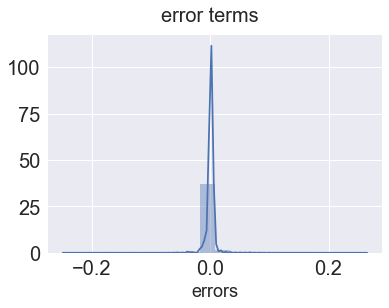

In [71]:
# lets plot an histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('error terms', fontsize = 20) 
plt.xlabel('errors', fontsize = 18)  

In [72]:
df_test[varlist1] = scaler.transform(df_test[varlist1])

In [73]:
# Split the 'df_test' set into X and y
y_test = df_test.pop('gmv')
X_test = df_test

In [74]:
# Let's check the list 'col2' which had the 10 variables RFE had selected
X_test_rfe2 = X_test[col1]

In [75]:
X_test_rfe2.columns

Index(['units', 'product_mrp', 'Discount_Percentage', 'Total Investment',
       'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing',
       'SEM', 'Radio', 'Other', 'Affiliates', 'NPS', 'NPSScore',
       'GMV_lag_2_per'],
      dtype='object')

In [76]:
X_train_rfe1.columns

Index(['units', 'product_mrp', 'Discount_Percentage', 'Digital', 'Other',
       'NPSScore', 'GMV_lag_2_per'],
      dtype='object')

In [77]:
# Let's now drop the variables we had manually eliminated as well
#X_test_rfe2 =X_test_rfe2[col]
#X_test = df_test
X_test_rfe2 = X_test_rfe2[X_train_rfe1.columns]

In [78]:
X_test_rfe2.columns

Index(['units', 'product_mrp', 'Discount_Percentage', 'Digital', 'Other',
       'NPSScore', 'GMV_lag_2_per'],
      dtype='object')

In [79]:
# Add a constant to the test set created
#X_test_rfe2 = sm.add_constant(X_test_rfe2)
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32043 entries, 68104 to 66491
Data columns (total 7 columns):
units                  32043 non-null float64
product_mrp            32043 non-null float64
Discount_Percentage    32043 non-null float64
Digital                32043 non-null float64
Other                  32043 non-null float64
NPSScore               32043 non-null float64
GMV_lag_2_per          32043 non-null float64
dtypes: float64(7)
memory usage: 2.0 MB


In [81]:
# Making predictions
y_pred = lm_10.predict(X_test_rfe2)

In [82]:
print(X_test_rfe2.shape)
print(X_train_rfe1.shape)

(32043, 7)
(74767, 7)


Text(0,0.5,'y_pred')

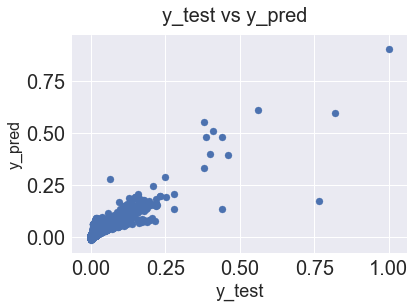

In [83]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

In [84]:
# r2_score for 6 variables
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8670434358046769

In [85]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [86]:
rmse = sqrt(mean_squared_error(y_test, y_pred))
rmse

0.008111139033476026

In [87]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
import numpy as np

In [88]:
regr = LinearRegression() 
  
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [89]:
regr.score(X_test, y_test)

0.8945442858552052

In [90]:
scores = cross_val_score(regr, X_train, y_train, cv = 5)    #cv is the number of folds, scores will give an array of scores

print('Cross Validation scores: ', scores)

print('Mean and std deviation: ', np.mean(scores), np.std(scores))

#To get predictions (y_hat) and check them all in one using cross validation

predictions = cross_val_predict(regr, X_test, y_test, cv = 5)     #y_test is needed here in predictions to get scores for each fold of cv

accuracy = metrics.r2_score(y_test, predictions)  #this says the accuracy of the predictions from the best cv fold


#If this is good, continue to fit the model on the data


regr.fit(X_train, y_train)

y_hat = regr.predict(X_test)      #this gives me my predictions

regr.score(X_test, y_test)  

Cross Validation scores:  [ 9.14154852e-01 -1.71916971e+13 -1.31404442e+16  9.02023250e-01
  9.11014101e-01]
Mean and std deviation:  -2631527170370298.5 5254462710824976.0


0.8945442858552052